{0: [0.8014910697937012, 0.8240468621253967, 0.9141427278518677, 0.8097816228866577, 0.8547332525253296, 0.8290964007377625, 0.8194560289382935, 0.8736078977584839, 0.7882652521133423, 0.8025998115539551, 0.7857324242591858, 0.8029857635498047, 0.8194926738739013, 0.7694132447242736, 0.9012582659721374, 0.7839866757392884, 0.8153506636619567, 0.8772230863571167, 0.8544641613960267, 0.7812134623527527, 0.8229261040687561, 0.7588351964950562, 0.695061182975769, 0.7751225352287292, 0.8566132545471191, 0.7745012164115905, 0.7688114047050476, 0.8232502937316895, 0.7991005897521972, 0.8077266812324524]}


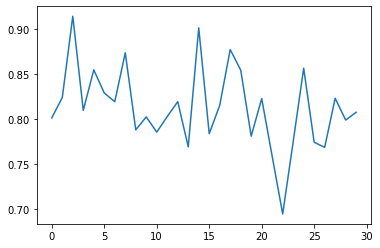

In [2]:
'''
    union_loss = 1*triplet_loss+ 0.5*pre_loss
    return union_loss

device = 'cuda:7'
batch_size = 16
epochs = 350
lr = 0.0001
decay = 1e-3
num_layer = 5
emb_dim = 300
dropout_ratio = 0
JK = 'last'
dataset = 'EAAT3'
output_model_file = ''
gnn_type = 'gin'
seed = 100
num_workers = 8
mode = 'ada_batch_all_triplet_loss'   #ada_batch_all_triplet_loss,ada_batch_hard_triplet_loss,triplet_loss
feature_type = 'custom'  #random,onehot,custom,pseudo
graph_pooling = 'set2set2' #mean,last,sum,set2set,atention
'''
import numpy as np
import matplotlib.pyplot as plt
#eaat3
#l = {0.1: [[0.12397763878107071, 0.15100525319576263, 0.2432694286108017, 0.8323385715484619, 0.2224656194448471], [0.42591121792793274, 0.6115905046463013, 0.6397701501846313, 0.39110496640205383, 0.6903523206710815], [0.5627261996269226, 1.0745419263839722, 0.9950058460235596, 0.780849039554596, 0.6827929019927979], [0.5234470367431641, 0.6621171236038208, 0.35246387124061584, 0.6281891465187073, 0.5414535999298096], [0.9847184419631958, 0.6829659342765808, 0.8412525653839111, 0.5300678014755249, 0.5835644006729126], [1.078069806098938, 0.590480387210846, 0.5342810750007629, 0.500374436378479, 0.8600553274154663], [0.4518831968307495, 0.4616188108921051, 0.40798795223236084, 0.3567218482494354, 0.2675700783729553], [0.5753350257873535, 0.5959947109222412, 0.8114128708839417, 0.539884626865387, 0.7645397186279297], [0.4999910593032837, 0.6055461168289185, 0.8646930456161499, 0.3861353099346161, 0.5413205623626709], [0.6592694520950317, 0.5272039771080017, 0.6207247376441956, 0.5054771304130554, 0.5194342136383057], [0.3949894905090332, 0.6088177561759949, 0.7465469241142273, 0.5097749829292297, 0.6088081002235413]], 0.2: [[0.2336755096912384, 0.7474241256713867, 0.2976728677749634, 0.22715558111667633, 0.2616965174674988], [0.9274662733078003, 0.6500252485275269, 0.4656510055065155, 0.6409144997596741, 0.4296598732471466], [0.8120025396347046, 0.6744567155838013, 0.7707133293151855, 0.9891668558120728, 1.2626464366912842], [0.3872985243797302, 0.44727274775505066, 0.589911937713623, 0.33880558609962463, 0.4906546175479889], [0.9949734807014465, 0.49706482887268066, 0.9812023639678955, 0.7287330031394958, 1.013932466506958], [1.01943838596344, 0.5127874612808228, 0.7576050758361816, 0.5812047719955444, 0.5675672888755798], [0.2619742453098297, 0.1774785816669464, 0.3986482620239258, 0.37202754616737366, 0.49611395597457886], [0.626695454120636, 0.7313365936279297, 0.6515595316886902, 0.7679478526115417, 0.7640208601951599], [0.48143479228019714, 0.37207698822021484, 0.41880303621292114, 0.42129045724868774, 0.5401152968406677], [0.6447462439537048, 0.4324846565723419, 0.46889206767082214, 0.5884189009666443, 0.4783494472503662], [0.47297075390815735, 0.686591386795044, 0.6773347854614258, 0.5241860747337341, 0.5269766449928284]], 0.3: [[0.31445586681365967, 0.6580959558486938, 0.43070188164711, 0.13141845166683197, 0.25693491101264954], [0.5284503698348999, 0.5330675840377808, 1.0739859342575073, 0.4498365819454193, 0.6753673553466797], [0.6193715929985046, 0.9316725134849548, 1.2557873725891113, 0.4888208210468292, 0.9459531307220459], [0.695399820804596, 0.38242217898368835, 0.6852057576179504, 0.38825392723083496, 0.32967111468315125], [0.7180517911911011, 1.3356999158859253, 0.4152161478996277, 0.8999656438827515, 0.5018337965011597], [0.6393924355506897, 0.7242062091827393, 0.6467846632003784, 0.5003058314323425, 0.6872326135635376], [0.3030846416950226, 0.4118184447288513, 0.45905494689941406, 0.2998233139514923, 0.21939684450626373], [0.710898756980896, 0.5665866136550903, 0.7003980875015259, 0.6703305244445801, 0.7933785915374756], [0.38963133096694946, 0.72564297914505, 0.3635992109775543, 0.5507473349571228, 0.45815983414649963], [0.656821072101593, 0.4226677417755127, 0.544633150100708, 0.5138781070709229, 0.5925003290176392], [0.5292580127716064, 0.5881364345550537, 0.6627123951911926, 0.4938637912273407, 0.49104493856430054]], 0.4: [[0.2196251004934311, 0.6018533706665039, 0.21173082292079926, 0.24865403771400452, 0.29102542996406555], [0.3954872488975525, 0.8365296125411987, 0.8610658645629883, 0.4883745610713959, 0.5186297297477722], [1.0298066139221191, 0.9641884565353394, 1.0160768032073975, 0.9924341440200806, 0.6663476824760437], [0.453673779964447, 0.635633647441864, 0.5060692429542542, 0.3966774642467499, 0.48233193159103394], [0.8305743932723999, 0.8650504350662231, 0.6148273348808289, 1.0625758171081543, 0.8562000393867493], [0.7197763323783875, 0.5872534513473511, 0.49461886286735535, 0.7459409832954407, 0.5221596956253052], [0.4006594717502594, 0.5048359632492065, 0.31071552634239197, 0.23219552636146545, 0.5769305229187012], [0.8640302419662476, 0.7833497524261475, 0.6362158060073853, 0.6404698491096497, 0.5255836844444275], [0.5042912364006042, 0.43780216574668884, 0.5052466988563538, 0.3980261981487274, 0.27865317463874817], [0.4356266260147095, 0.5191366672515869, 0.6138080358505249, 0.566870927810669, 0.6043216586112976], [0.4796649217605591, 0.572644054889679, 0.6208875775337219, 0.5218302607536316, 0.5637758374214172]], 0.5: [[0.40031954646110535, 0.289668470621109, 0.20655666291713715, 0.7373679280281067, 0.2175748497247696], [0.6694395542144775, 0.6591331362724304, 0.7511838674545288, 0.6220653653144836, 0.4321030378341675], [0.9369540214538574, 0.7140679955482483, 0.5240339636802673, 0.6534347534179688, 0.805173933506012], [0.5735974907875061, 0.5871301293373108, 0.4645339846611023, 0.38561975955963135, 0.6397466659545898], [0.8039981126785278, 0.7076743245124817, 0.7233564257621765, 0.6543746590614319, 0.6607887744903564], [0.5909443497657776, 0.5674912929534912, 0.6101014018058777, 0.6082971096038818, 0.587179958820343], [0.2663836181163788, 0.2698877155780792, 0.34392282366752625, 0.4465563893318176, 0.3808544874191284], [0.6533439755439758, 0.6630623936653137, 0.5380341410636902, 0.7193102836608887, 0.935922384262085], [0.844037652015686, 0.5863500237464905, 0.5755637884140015, 0.6156907081604004, 0.3460005223751068], [0.4712914824485779, 0.597693920135498, 0.49199435114860535, 0.6675022840499878, 0.7428022027015686], [0.4531056880950928, 0.5595855712890625, 0.6579930186271667, 0.5263628363609314, 0.6191098690032959]], 0.6: [[0.6202445030212402, 0.2202339768409729, 0.2832794189453125, 0.22314366698265076, 0.10727056115865707], [0.7501235604286194, 0.6363733410835266, 0.6414254307746887, 0.563116192817688, 0.5347751975059509], [0.4622189700603485, 0.8024576902389526, 0.6499367952346802, 0.4815415143966675, 1.077072262763977], [0.4184800386428833, 0.42772719264030457, 0.6034802794456482, 0.518912136554718, 0.638788640499115], [1.0913726091384888, 0.5654879808425903, 0.982404887676239, 0.639356791973114, 0.47132089734077454], [0.5225672125816345, 0.6521583795547485, 0.7024136781692505, 0.7224771976470947, 0.8783529996871948], [0.30437150597572327, 0.22868399322032928, 0.4118785560131073, 0.4917586147785187, 0.33481329679489136], [0.6922021508216858, 0.48175445199012756, 0.9527413249015808, 0.7464442849159241, 0.7175489068031311], [0.6356822848320007, 0.7355947494506836, 0.836304783821106, 0.5115538239479065, 0.3903571367263794], [0.6849912405014038, 0.5231912136077881, 0.7402265667915344, 0.5639374852180481, 0.5205336213111877], [0.42489543557167053, 0.5408464074134827, 0.5740745663642883, 0.5968525409698486, 0.7083960771560669]], 0.7: [[0.22638627886772156, 0.3185424506664276, 0.4274292588233948, 0.3145272135734558, 0.6284979581832886], [0.7014572620391846, 0.5336801409721375, 0.7407851219177246, 0.6105746626853943, 0.5310772657394409], [0.8040434718132019, 0.8689039945602417, 0.5237952470779419, 0.6810529232025146, 0.43598422408103943], [0.41245317459106445, 0.410705029964447, 0.45363444089889526, 0.40344157814979553, 0.665520966053009], [1.1472922563552856, 0.8550601005554199, 0.6623672842979431, 0.6454132795333862, 0.7129584550857544], [0.6684936881065369, 0.6254127025604248, 0.5963588953018188, 0.8584521412849426, 0.6158320307731628], [0.4333333373069763, 0.3733230531215668, 0.2772064805030823, 0.40056702494621277, 0.40176814794540405], [0.7605482339859009, 0.5587520003318787, 0.8035902976989746, 0.6757299304008484, 0.6875219345092773], [0.32870617508888245, 0.6539114117622375, 0.37064075469970703, 0.4182010293006897, 0.5598042607307434], [0.4402334988117218, 0.6275426149368286, 0.5168513655662537, 0.6543940901756287, 0.5901696681976318], [0.5415323376655579, 0.5989956259727478, 0.6420616507530212, 0.5578524470329285, 0.530742347240448]], 0.8: [[0.7740125060081482, 0.14129433035850525, 0.16548296809196472, 0.32771313190460205, 0.20256049931049347], [0.4803771376609802, 0.5767273306846619, 0.9963456392288208, 0.6134147644042969, 0.8732054233551025], [0.531819760799408, 0.6173689365386963, 0.5501556992530823, 0.6871675252914429, 0.8403761386871338], [0.5489740967750549, 0.5451180338859558, 0.5319928526878357, 0.41625547409057617, 0.444519579410553], [0.6930384635925293, 0.5314837098121643, 0.6431999206542969, 0.7492562532424927, 0.9345058798789978], [1.0172876119613647, 0.5200719237327576, 0.6255205869674683, 0.39878419041633606, 0.5134899616241455], [0.3543921411037445, 0.26608744263648987, 0.39790186285972595, 0.43911266326904297, 0.4469637870788574], [0.48896828293800354, 0.6567898988723755, 0.7353060245513916, 0.8199121356010437, 0.7163534164428711], [0.5143367052078247, 0.5310645699501038, 0.40351587533950806, 0.8157617449760437, 0.6485554575920105], [0.6555715799331665, 0.527972936630249, 0.6083398461341858, 0.5647303462028503, 0.5097208023071289], [0.48870450258255005, 0.5351556539535522, 0.5313103795051575, 0.778704822063446, 0.565841555595398]], 0.9: [[0.48524677753448486, 0.3652603328227997, 0.2897576689720154, 0.7586021423339844, 0.30983415246009827], [0.914152204990387, 0.4198611378669739, 0.4990684390068054, 0.6902212500572205, 0.5224934220314026], [0.9418034553527832, 0.887225329875946, 0.7184074521064758, 0.5312564969062805, 0.4780415892601013], [0.5595154166221619, 0.8584257364273071, 0.5754961967468262, 0.36288386583328247, 0.29465600848197937], [1.1142334938049316, 0.5345012545585632, 0.49014806747436523, 0.6919662952423096, 0.9588854908943176], [0.6065047979354858, 0.741762101650238, 0.6817132830619812, 0.5841001868247986, 0.6573772430419922], [0.3037196695804596, 0.4193405508995056, 0.3399970233440399, 0.32975029945373535, 0.39468914270401], [0.46706143021583557, 0.7677487730979919, 0.8639804720878601, 0.6654300093650818, 0.6564195156097412], [0.7271403074264526, 0.5605084896087646, 0.3873470425605774, 0.3373262286186218, 0.7014586925506592], [0.6107357740402222, 0.7312741875648499, 0.5122765898704529, 0.5215789675712585, 0.5420153141021729], [0.7101717591285706, 0.40033453702926636, 0.6739195585250854, 0.6043489575386047, 0.4832044243812561]], 1.0: [[0.2612375020980835, 0.7867944836616516, 0.3090147376060486, 0.2866261303424835, 0.47023242712020874], [0.5480695366859436, 0.8966577649116516, 0.6176856756210327, 0.6444160342216492, 0.4865719974040985], [0.8194372653961182, 0.3817576467990875, 0.49851760268211365, 0.5215288400650024, 0.7584672570228577], [0.6516208052635193, 0.39987796545028687, 0.49141111969947815, 0.4525948464870453, 0.33281567692756653], [1.1963216066360474, 0.667057991027832, 0.5747634172439575, 0.6012393236160278, 0.7418591380119324], [0.5187162756919861, 0.8137220740318298, 0.7396425604820251, 0.7679953575134277, 0.6214656233787537], [0.31746387481689453, 0.3323040008544922, 0.29968637228012085, 0.4651441276073456, 0.3240789771080017], [0.7653253674507141, 0.7875051498413086, 0.7191122770309448, 0.6019397974014282, 0.6928040981292725], [0.4981498420238495, 0.5281001925468445, 0.39997223019599915, 0.28501904010772705, 0.4310525059700012], [0.4770287871360779, 0.7458007335662842, 0.50002521276474, 0.65715092420578, 0.4228195250034332], [0.5562529563903809, 0.5259125232696533, 0.7196158170700073, 0.5791592001914978, 0.5336894989013672]], 1.1: [[0.29280969500541687, 0.7789055705070496, 0.14885123074054718, 0.23283563554286957, 0.32813993096351624], [0.2869134843349457, 0.6617459654808044, 0.6690549254417419, 0.6291066408157349, 0.5613298416137695], [0.9075039625167847, 0.6874545812606812, 1.147326946258545, 0.5976018905639648, 0.7842570543289185], [0.39145222306251526, 0.4298091530799866, 0.38857191801071167, 0.757784903049469, 0.4906980097293854], [1.0421427488327026, 0.6236832141876221, 0.5675691962242126, 0.879477858543396, 0.6376317143440247], [0.695090651512146, 0.9845767617225647, 0.6121845841407776, 0.5925400853157043, 0.6128994822502136], [0.3062496483325958, 0.4053690731525421, 0.38995763659477234, 0.37033697962760925, 0.31984415650367737], [0.6746665239334106, 0.6281108260154724, 0.8144594430923462, 0.6805522441864014, 0.7098712921142578], [0.4984024167060852, 0.5457757711410522, 0.3511740565299988, 0.37310707569122314, 0.353045254945755], [0.544158399105072, 0.694634735584259, 0.5179913640022278, 0.46245431900024414, 0.5407206416130066], [0.5971302390098572, 0.6076690554618835, 0.6003172993659973, 0.5882864594459534, 0.4457722306251526]], 1.2: [[0.33244040608406067, 0.7537527084350586, 0.08483294397592545, 0.21789337694644928, 0.2300601303577423], [0.354695200920105, 0.680575966835022, 1.1556751728057861, 0.42274701595306396, 0.749739408493042], [0.6429845094680786, 0.7065490484237671, 0.863658607006073, 0.643871009349823, 0.8472562432289124], [0.5436205863952637, 0.365465372800827, 0.7259902358055115, 0.43928074836730957, 0.46896058320999146], [0.9355362057685852, 0.41600659489631653, 0.4569520652294159, 1.0472387075424194, 0.5646357536315918], [0.4367413818836212, 0.9137197136878967, 0.6612631678581238, 0.5962451696395874, 0.7414207458496094], [0.2812325358390808, 0.29725027084350586, 0.35219720005989075, 0.45652347803115845, 0.4647611379623413], [0.7280979752540588, 0.6948553323745728, 0.9362837672233582, 0.7103440761566162, 0.5810927152633667], [0.4918154776096344, 0.5374050140380859, 0.734263002872467, 0.3061472177505493, 0.7591434121131897], [0.5162990093231201, 0.8174645304679871, 0.4197503328323364, 0.6038436889648438, 0.4702770411968231], [0.4376871585845947, 0.5910468697547913, 0.5034115314483643, 0.5622773766517639, 0.7308247685432434]], 1.3: [[0.2523995637893677, 0.5891028046607971, 0.15910622477531433, 0.7054859399795532, 0.3699212968349457], [0.5722522735595703, 0.99514240026474, 0.4901304543018341, 0.9078836441040039, 0.41030263900756836], [0.8953038454055786, 1.0457459688186646, 0.5377198457717896, 0.7105474472045898, 0.9058374762535095], [0.4021711051464081, 0.7041290998458862, 0.38135409355163574, 0.398174524307251, 0.5067793130874634], [0.5593072772026062, 0.8545234799385071, 0.8724592924118042, 0.7045527100563049, 0.6302757859230042], [0.6270543336868286, 0.5192127227783203, 0.8402576446533203, 0.47914940118789673, 0.7051337957382202], [0.35363873839378357, 0.3616156578063965, 0.34764552116394043, 0.6200823187828064, 0.2763921320438385], [0.8172374367713928, 0.6424151062965393, 0.7413703203201294, 0.7669968605041504, 0.5797871351242065], [0.631416380405426, 0.593714714050293, 0.5158709287643433, 0.3825130760669708, 0.5169323682785034], [0.6221160888671875, 0.582064151763916, 0.4666702151298523, 0.46627774834632874, 0.5745982527732849], [0.6107575297355652, 0.5582275390625, 0.5547906756401062, 0.6457091569900513, 0.5038462281227112]], 1.4: [[0.5566740036010742, 0.1422295719385147, 0.30360230803489685, 0.4551464915275574, 0.6838024854660034], [0.6256067752838135, 0.575598955154419, 0.7273609042167664, 0.5694742202758789, 0.5278879404067993], [0.854055643081665, 0.47624364495277405, 0.5708228945732117, 0.8614829778671265, 0.5802626609802246], [0.5253689289093018, 0.3748186230659485, 0.41149598360061646, 0.586607038974762, 0.4363937973976135], [0.7358627915382385, 0.5547204613685608, 0.8596965670585632, 0.589330792427063, 1.0454130172729492], [0.5460168123245239, 0.685066819190979, 0.784957766532898, 0.5859540700912476, 0.7353312373161316], [0.46440500020980835, 0.39632007479667664, 0.4066970646381378, 0.2622637152671814, 0.20726795494556427], [0.5658537149429321, 0.6847867369651794, 0.7589511275291443, 0.6452775001525879, 0.6707755327224731], [0.47113850712776184, 0.6731081604957581, 0.5857222676277161, 0.7385859489440918, 0.7485325932502747], [0.6159434914588928, 0.6404787302017212, 0.7286928296089172, 0.5063621997833252, 0.5489320158958435], [0.5951685309410095, 0.4579295814037323, 0.6321542263031006, 0.5017033815383911, 0.5265341997146606]], 1.5: [[0.22962892055511475, 0.7051419019699097, 0.1475575715303421, 0.14502328634262085, 0.25153136253356934], [0.6914840340614319, 1.0251319408416748, 0.39228489995002747, 0.7117183208465576, 0.34054481983184814], [0.7019254565238953, 0.6696156859397888, 0.5987426042556763, 0.9046393632888794, 0.8230721950531006], [0.45199260115623474, 0.5032418370246887, 0.4107968807220459, 0.5973684191703796, 0.4901198744773865], [0.5846192836761475, 0.716524600982666, 0.679003119468689, 0.7762263417243958, 0.7853996157646179], [0.8564292192459106, 0.5250738263130188, 0.5371695756912231, 0.6429815888404846, 0.686667263507843], [0.2799347937107086, 0.43533018231391907, 0.3627793490886688, 0.28642743825912476, 0.3445397913455963], [0.7299197316169739, 0.6908347606658936, 0.9536877274513245, 0.691962718963623, 0.6484658718109131], [0.34486013650894165, 0.7034128904342651, 0.5432794690132141, 0.4163396656513214, 0.5702541470527649], [0.44417572021484375, 0.646334171295166, 0.43137621879577637, 0.5744956135749817, 0.5207122564315796], [0.5569888353347778, 0.5748344659805298, 0.639999508857727, 0.39528757333755493, 0.5930681824684143]], 1.6: [[0.1492825597524643, 0.28997603058815, 0.18107610940933228, 0.3854432702064514, 0.7268867492675781], [0.781776487827301, 0.6720449924468994, 0.41517797112464905, 0.8075807094573975, 0.4577447474002838], [0.7986394762992859, 0.4323751926422119, 0.5884270071983337, 0.6120346784591675, 0.8283798098564148], [0.5104088187217712, 0.5851128697395325, 0.36793598532676697, 0.4489932954311371, 0.45335328578948975], [0.5038900375366211, 0.8452376127243042, 0.9353786706924438, 1.04790198802948, 0.8210131525993347], [0.6781308650970459, 0.46367350220680237, 0.5343503355979919, 0.7462575435638428, 0.8354598879814148], [0.27920177578926086, 0.2501208484172821, 0.2670634984970093, 0.4126834273338318, 0.5205696821212769], [0.6883460879325867, 0.7845655083656311, 0.5713406801223755, 0.974504828453064, 0.442550390958786], [0.3400513827800751, 0.6397212743759155, 0.6057710647583008, 0.38888534903526306, 0.5217182636260986], [0.7222604751586914, 0.4190887212753296, 0.5727864503860474, 0.7052144408226013, 0.4601023495197296], [0.5315353274345398, 0.5236206650733948, 0.5869588255882263, 0.5809351205825806, 0.47538745403289795]], 1.7: [[0.40281981229782104, 0.7836496233940125, 0.125979945063591, 0.30502671003341675, 0.03804349899291992], [0.3674984276294708, 0.7921152114868164, 0.4124548137187958, 0.5268252491950989, 0.4792454242706299], [0.8214815258979797, 0.3483083248138428, 0.939739465713501, 0.9249487519264221, 0.6607836484909058], [0.41142746806144714, 0.5683590769767761, 0.35651612281799316, 0.6377455592155457, 0.34593942761421204], [0.6787636876106262, 0.9189991354942322, 0.685523509979248, 1.0534886121749878, 0.647156834602356], [0.5998097658157349, 0.8198886513710022, 0.7443019151687622, 0.7519736289978027, 0.6137438416481018], [0.337981641292572, 0.3223593533039093, 0.3909091055393219, 0.2623957693576813, 0.7589489221572876], [0.607230007648468, 0.6651015281677246, 0.7299961447715759, 0.8454961776733398, 0.5337992310523987], [0.5112002491950989, 0.5793274641036987, 0.5000244379043579, 0.4871898591518402, 0.5298241972923279], [0.5022046566009521, 0.5563812851905823, 0.6321656703948975, 0.5245649814605713, 0.545184850692749], [0.5455477833747864, 0.4518626928329468, 0.5811878442764282, 0.5779284834861755, 0.6669732928276062]], 1.8: [[0.3967491388320923, 0.4073173403739929, 0.7138261198997498, 0.27801886200904846, 0.15440352261066437], [0.4143168330192566, 0.6942169070243835, 0.6313847303390503, 1.08760666847229, 0.3224698007106781], [0.8297804594039917, 1.1627308130264282, 0.7602115869522095, 0.6527681946754456, 0.608674943447113], [0.40566715598106384, 0.571421205997467, 0.30908021330833435, 0.5450802445411682, 0.5708591938018799], [0.6942017674446106, 0.7507432699203491, 0.498379111289978, 0.6667476892471313, 0.7610562443733215], [0.8193191289901733, 0.5748727917671204, 0.7348954677581787, 0.6521868109703064, 0.6352709531784058], [0.26389065384864807, 0.40967217087745667, 0.28609344363212585, 0.5224615931510925, 0.31560060381889343], [0.713540256023407, 0.7129493951797485, 0.5156469941139221, 0.8255293369293213, 0.7218020558357239], [0.46696606278419495, 0.2582738995552063, 0.2712059020996094, 0.9080386161804199, 0.3225141763687134], [0.5308100581169128, 0.5883811116218567, 0.42571622133255005, 0.7763359546661377, 0.5576008558273315], [0.4020015299320221, 0.5328675508499146, 0.447604238986969, 0.6462573409080505, 0.6123709082603455]], 1.9: [[0.16554829478263855, 0.3385166525840759, 0.679721474647522, 0.3439582288265228, 0.43323689699172974], [0.5177922248840332, 0.6632387042045593, 0.44185125827789307, 0.8572537899017334, 0.5537655353546143], [1.1058052778244019, 0.974875271320343, 0.4080403447151184, 0.5563015937805176, 0.7854694724082947], [0.5439863801002502, 0.3780187666416168, 0.4994189739227295, 0.4285636246204376, 0.5837721824645996], [0.5209636688232422, 0.7522507309913635, 0.792918860912323, 0.7459990978240967, 0.8483180999755859], [0.5538175702095032, 0.6527056694030762, 0.5856634378433228, 0.7019763588905334, 0.825595498085022], [0.3701925575733185, 0.3504736125469208, 0.36598894000053406, 0.20733797550201416, 0.332225501537323], [0.5998708009719849, 0.932866632938385, 0.7742215991020203, 0.6620256304740906, 0.5153840184211731], [0.46468842029571533, 0.4267719089984894, 0.3339901566505432, 1.0047367811203003, 0.4088858664035797], [0.4607331156730652, 0.5652888417243958, 0.5168570280075073, 0.7449206709861755, 0.5605257153511047], [0.667472243309021, 0.6725266575813293, 0.43501782417297363, 0.612389087677002, 0.4625091254711151]], 2.0: [[0.74969482421875, 0.24501124024391174, 0.21188215911388397, 0.1466214507818222, 0.3107715845108032], [0.8310464024543762, 0.3271465301513672, 0.7265721559524536, 0.4227065443992615, 0.5998575687408447], [0.487804114818573, 1.0301358699798584, 0.5275141000747681, 0.5967096090316772, 0.3364936411380768], [0.5355952978134155, 0.4393366575241089, 0.4303922653198242, 0.5163341164588928, 0.46226030588150024], [0.7488303780555725, 0.7409128546714783, 0.6168394684791565, 0.6101533770561218, 0.8454993963241577], [0.5018780827522278, 0.8291093111038208, 0.7303076386451721, 0.5885809659957886, 0.7759172320365906], [0.4834534525871277, 0.3049432933330536, 0.4200524389743805, 0.35824206471443176, 0.2762068212032318], [0.5761578679084778, 0.7702657580375671, 0.7754343748092651, 0.8212365508079529, 0.8538708090782166], [0.5067891478538513, 0.5281206965446472, 0.6194416880607605, 0.34829550981521606, 0.6396663784980774], [0.5835410356521606, 0.43765735626220703, 0.5819658041000366, 0.6979329586029053, 0.6534641981124878], [0.5093815326690674, 0.570903480052948, 0.6161438226699829, 0.6548651456832886, 0.522260844707489]], 2.1: [[0.2549183964729309, 0.12162408232688904, 0.6490666270256042, 0.2347870171070099, 0.11236568540334702], [0.6119094491004944, 0.5559883713722229, 0.6080605387687683, 0.9930291771888733, 0.5863198041915894], [0.8562428951263428, 0.4432153105735779, 0.6623136401176453, 1.0980751514434814, 0.5840148329734802], [0.5142179727554321, 0.43466633558273315, 0.4672679603099823, 0.5526513457298279, 0.4366135001182556], [0.7407687306404114, 1.1517231464385986, 0.7106550931930542, 0.6245871186256409, 0.5714054703712463], [0.47168079018592834, 0.5713080763816833, 0.7055038213729858, 0.9458999037742615, 0.7322825193405151], [0.3858875036239624, 0.33269834518432617, 0.34197747707366943, 0.4542195796966553, 0.39607906341552734], [0.9463690519332886, 0.6406528949737549, 0.5303635597229004, 0.8408346772193909, 0.46176713705062866], [0.28664693236351013, 0.4331232011318207, 0.44779810309410095, 0.7376220226287842, 0.44252052903175354], [0.6321240663528442, 0.451663613319397, 0.5743752717971802, 0.7361706495285034, 0.3817419409751892], [0.5203853845596313, 0.5095843076705933, 0.5756596326828003, 0.5213004946708679, 0.5893584489822388]], 2.2: [[0.48274871706962585, 0.7469790577888489, 0.21198777854442596, 0.22883151471614838, 0.22740906476974487], [0.6363047957420349, 0.960955023765564, 0.3982113301753998, 0.710986316204071, 0.3225058913230896], [0.730430006980896, 1.0724784135818481, 0.8037147521972656, 1.0642403364181519, 0.6836086511611938], [0.5620570182800293, 0.6771070957183838, 0.3061158359050751, 0.38166365027427673, 0.5074423551559448], [0.8966334462165833, 1.119004726409912, 1.024228811264038, 0.7658778429031372, 0.8225330114364624], [0.47491809725761414, 0.63801109790802, 0.5586588978767395, 0.8072716593742371, 0.873276948928833], [0.4573824405670166, 0.23922628164291382, 0.2777389585971832, 0.36499693989753723, 0.32947036623954773], [0.6846450567245483, 0.6214614510536194, 0.8118242621421814, 0.7502476572990417, 0.9132188558578491], [0.6096439957618713, 0.3625871241092682, 0.5072345733642578, 0.4188219904899597, 0.7862364649772644], [0.5595624446868896, 0.5413495898246765, 0.7265787720680237, 0.48226702213287354, 0.34359797835350037], [0.5609471797943115, 0.5079188942909241, 0.6296918988227844, 0.5137955546379089, 0.5740938186645508]], 2.3: [[0.5586276054382324, 0.06800311803817749, 0.22752371430397034, 0.21585388481616974, 0.12536220252513885], [0.766783595085144, 0.4781254231929779, 0.6723602414131165, 0.5120963454246521, 1.0323879718780518], [0.7697127461433411, 0.812608540058136, 0.4619728922843933, 0.3510934114456177, 0.9843625426292419], [0.45124056935310364, 0.8139668703079224, 0.5313687324523926, 0.40048104524612427, 0.5068709254264832], [0.5653294920921326, 1.0595951080322266, 0.6650711297988892, 0.5915372967720032, 0.7889901399612427], [0.6191633343696594, 0.8359531164169312, 0.8137798309326172, 0.7347087264060974, 0.541769802570343], [0.47271159291267395, 0.4040081202983856, 0.7297816872596741, 0.33992382884025574, 0.3656269311904907], [0.614412248134613, 0.7032396197319031, 0.6260008215904236, 0.7371987104415894, 0.6451166868209839], [0.4884594678878784, 0.4850085973739624, 0.5488015413284302, 0.35327914357185364, 0.5141147375106812], [0.7501397728919983, 0.3808309733867645, 0.5494004487991333, 0.6875150799751282, 0.5516517758369446], [0.6383830308914185, 0.5311004519462585, 0.5853135585784912, 0.5097396969795227, 0.39235275983810425]], 2.4: [[0.2986803352832794, 0.4943147897720337, 0.1854258030653, 0.759462833404541, 0.3547065854072571], [0.44528117775917053, 0.4203668534755707, 0.9291878342628479, 0.6913034915924072, 0.9598332047462463], [0.5252888202667236, 0.9938570261001587, 0.7417477369308472, 0.8638406991958618, 0.6001241207122803], [0.4968265891075134, 0.47058114409446716, 0.4120263159275055, 0.6066201329231262, 0.3377905488014221], [0.5487420558929443, 0.525585949420929, 1.3237327337265015, 0.9631343483924866, 0.8801974654197693], [0.7062683701515198, 0.7005217671394348, 0.8474496006965637, 0.5498708486557007, 0.6556119322776794], [0.33687376976013184, 0.32937246561050415, 0.38195928931236267, 0.3706128001213074, 0.27512606978416443], [0.5651013851165771, 0.710206151008606, 0.6162631511688232, 0.8022154569625854, 0.7126019597053528], [0.6171814203262329, 0.5276421308517456, 0.3612798750400543, 0.3772691786289215, 0.7316910624504089], [0.6686455011367798, 0.5418779253959656, 0.5845391750335693, 0.35478475689888, 0.6052988171577454], [0.6527764201164246, 0.5992556810379028, 0.5013786554336548, 0.4999265968799591, 0.5293412208557129]], 2.5: [[0.23954759538173676, 0.18556548655033112, 0.3550601005554199, 0.24406887590885162, 0.7426437735557556], [0.7097824215888977, 0.7572735548019409, 0.5130911469459534, 0.46653684973716736, 0.7600353360176086], [0.46659547090530396, 0.5575311779975891, 0.7148844599723816, 0.7808282375335693, 0.49492788314819336], [0.4923207461833954, 0.587820291519165, 0.31783223152160645, 0.4277821183204651, 0.5265793800354004], [0.8056385517120361, 1.2839014530181885, 0.5587001442909241, 1.0684378147125244, 0.6584731340408325], [0.9702637195587158, 0.6022818684577942, 0.5403255224227905, 0.5884425640106201, 0.6023014783859253], [0.24155333638191223, 0.3778018057346344, 0.4014466106891632, 0.2283136546611786, 0.40804776549339294], [0.6098595261573792, 0.8153217434883118, 0.7644058465957642, 0.61207115650177, 0.7812524437904358], [0.5013689398765564, 0.6009811162948608, 0.5616732239723206, 0.3462975025177002, 0.44072774052619934], [0.6762148141860962, 0.5500707626342773, 0.5029578804969788, 0.7030154466629028, 0.42692434787750244], [0.5615878701210022, 0.611146092414856, 0.5134297013282776, 0.5465536117553711, 0.6141701340675354]], 2.6: [[0.28951865434646606, 0.8555763959884644, 0.30629515647888184, 0.3302428126335144, 0.2698947489261627], [0.525383710861206, 0.6554595828056335, 0.6897677183151245, 0.5465304851531982, 0.7210575938224792], [0.6729831695556641, 0.6677351593971252, 0.7141549587249756, 0.746959388256073, 0.9537131190299988], [0.38137590885162354, 0.41597244143486023, 0.7411270141601562, 0.38454148173332214, 0.5339109897613525], [0.7167503237724304, 0.8424529433250427, 0.9128121733665466, 0.6425129175186157, 0.7919681668281555], [0.5845944881439209, 0.7446374297142029, 0.7790845036506653, 0.5692737102508545, 0.6562092900276184], [0.2784971296787262, 0.21441879868507385, 0.3287472128868103, 0.469048410654068, 0.3465859889984131], [0.6807588338851929, 0.6459937691688538, 0.8998819589614868, 0.8516471982002258, 0.6770970821380615], [0.4148142337799072, 0.3561621904373169, 0.7288945913314819, 0.22605155408382416, 0.39560750126838684], [0.47623828053474426, 0.5683984160423279, 0.469147652387619, 0.6505067348480225, 0.694469153881073], [0.5310623049736023, 0.6736111640930176, 0.49990272521972656, 0.4123600423336029, 0.6324951648712158]], 2.7: [[0.7890250086784363, 0.42524638772010803, 0.26149094104766846, 0.18680207431316376, 0.3974721431732178], [0.45791542530059814, 0.4334201514720917, 0.8314453363418579, 0.5221638083457947, 0.40272918343544006], [0.7224472761154175, 0.47770580649375916, 0.6831164360046387, 0.8120055794715881, 1.4443873167037964], [0.495326429605484, 0.4683173596858978, 0.5950607061386108, 0.4400121867656708, 0.4971480965614319], [0.8278077244758606, 0.7600678205490112, 0.9580766558647156, 1.2492815256118774, 0.8019516468048096], [0.8723141551017761, 0.6291217803955078, 0.6505034565925598, 0.6243014931678772, 0.5718928575515747], [0.7595288753509521, 0.3532717227935791, 0.3047412037849426, 0.3030392825603485, 0.46554088592529297], [0.7508552074432373, 0.730029284954071, 0.5501827597618103, 0.7853912711143494, 0.5161928534507751], [0.3395037353038788, 0.366180956363678, 0.7942575812339783, 0.6712049841880798, 0.42974600195884705], [0.8144088387489319, 0.5744802355766296, 0.4859991669654846, 0.500892162322998, 0.6108816266059875], [0.4728839695453644, 0.5181257724761963, 0.5494694709777832, 0.5307691693305969, 0.6639127731323242]], 2.8: [[0.2819100618362427, 0.32677534222602844, 0.18219569325447083, 0.3496796488761902, 0.8723957538604736], [0.3350335359573364, 0.4805104732513428, 0.4964686334133148, 0.6074210405349731, 0.8893020153045654], [0.7215623259544373, 0.6801574230194092, 0.5409870743751526, 0.9487513303756714, 1.0415127277374268], [0.4099068343639374, 0.6800746917724609, 0.37731531262397766, 0.8833209872245789, 0.3704167604446411], [0.8347504138946533, 0.7974139451980591, 0.7447270154953003, 0.808139443397522, 0.5302242636680603], [0.7854112386703491, 0.8170949220657349, 0.7685040235519409, 0.7552616596221924, 0.5284755229949951], [0.3436537981033325, 0.46994197368621826, 0.543639063835144, 0.44989439845085144, 0.3184863328933716], [0.7002835869789124, 0.39708346128463745, 0.6525793671607971, 0.7053729891777039, 0.9292799830436707], [0.3395061492919922, 0.8577405214309692, 0.3544088304042816, 0.4539841115474701, 0.4346802532672882], [0.4728894829750061, 0.5395920276641846, 0.36019131541252136, 0.4582519233226776, 0.6667649745941162], [0.5498601198196411, 0.534007728099823, 0.5794678330421448, 0.5619621276855469, 0.5961635708808899]], 2.9: [[0.5054571032524109, 0.25903046131134033, 0.805530309677124, 0.2995404899120331, 0.38106784224510193], [0.6500326991081238, 0.6108748912811279, 0.623468279838562, 0.5477855205535889, 0.43733489513397217], [1.1315120458602905, 1.1217238903045654, 0.5359688401222229, 1.0947580337524414, 0.31320950388908386], [0.5696039199829102, 0.5488796234130859, 0.36943358182907104, 0.44202157855033875, 0.5887027382850647], [0.8361473679542542, 1.2782970666885376, 0.8111287355422974, 0.6429754495620728, 0.7133532166481018], [0.7657560706138611, 0.7408633232116699, 0.6646921038627625, 0.5902052521705627, 0.8662197589874268], [0.31238168478012085, 0.31563207507133484, 0.4218049943447113, 0.4877154529094696, 0.39317619800567627], [0.4572717547416687, 0.7331446409225464, 0.6123430132865906, 0.7865188121795654, 0.5662778615951538], [0.7611578702926636, 0.3541807234287262, 0.48607656359672546, 0.4655160903930664, 0.5104544758796692], [0.477910578250885, 0.7441249489784241, 0.5005201697349548, 0.4298679232597351, 0.5730769038200378], [0.5897409319877625, 0.5639058947563171, 0.5308769941329956, 0.6184983253479004, 0.5349267721176147]], 3.0: [[0.2391221523284912, 0.5334568023681641, 0.34278860688209534, 0.7915151119232178, 0.33039817214012146], [0.627901554107666, 0.5773975253105164, 0.8317132592201233, 0.4105643332004547, 0.6983739733695984], [0.5174320936203003, 1.102521538734436, 1.1262385845184326, 0.9232125878334045, 0.6572669148445129], [0.5551388263702393, 0.41017791628837585, 0.4153788387775421, 0.5720483064651489, 0.5892519354820251], [0.6669826507568359, 0.5476208925247192, 0.8880133628845215, 0.7106655836105347, 0.7191926836967468], [0.8912965655326843, 0.599859356880188, 0.6114110946655273, 0.6615050435066223, 0.4662206470966339], [0.47433552145957947, 0.2844178378582001, 0.2492016702890396, 0.3878600597381592, 0.3661307990550995], [0.6781592965126038, 0.6667590737342834, 0.8492118716239929, 0.5477219820022583, 0.7005667686462402], [0.3645348846912384, 0.5341761708259583, 0.4803594946861267, 0.5326524972915649, 0.32193276286125183], [0.5827804207801819, 0.583903968334198, 0.7559365630149841, 0.3920358419418335, 0.42982205748558044], [0.5657994747161865, 0.36865702271461487, 0.601465106010437, 0.6383219957351685, 0.6529444456100464]]}
cliff_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 
              1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
# m l =  {0.1: [[1.1313403727961522, 0.9509716033935547, 1.1516625600702621, 0.8765860445359174, 0.8910499086567]], 0.2: [[1.1289728365692437, 0.9510298862176783, 0.9112368588354073, 1.0731971626188241, 1.0486729857968349]], 0.3: [[1.1867316026313632, 1.0316135415843888, 1.2112986901227165, 1.1560928447573793, 1.1597406723920036]], 0.4: [[1.0527225802926456, 0.7688471254180459, 1.1976132778560413, 0.9666027286473442, 0.893335732759214]], 0.5: [[1.1769694791120642, 1.1230810740414787, 1.094563276159997, 1.025776690127803, 0.9705201854892805]], 0.6: [[1.3295033515668382, 0.990255195720523, 1.3062737899668075, 1.169827197112289, 1.072578440694248]], 0.7: [[1.0571821565721549, 1.1118236289304846, 0.9766590116070766, 1.1918278301463407, 0.9151927933973425]], 0.8: [[1.1857196653590483, 0.9938608080733056, 1.3890981557322484, 1.13498746881298, 1.3442750678342932]], 0.9: [[1.127965443274554, 1.0703533876175975, 1.0995119669858147, 1.2001179152844, 1.207955234190997]], 1.0: [[1.2447089284074073, 0.9990960721876107, 1.0386594463797176, 1.0262784233280258, 1.0358467148799522]], 1.1: [[1.3017871964211558, 1.2463068728353464, 1.1564125477098952, 1.0460045290928262, 1.2331054327534694]], 1.2: [[1.2633804316614188, 1.1922472154392916, 1.1442805820820379, 1.013690599039489, 1.1697281260116428]], 1.3: [[1.1366335761313344, 1.230843932020898, 1.2217597026450961, 1.1806478745797102, 1.1171386779523362]], 1.4: [[1.277542939373091, 1.3206120121712779, 1.2203787354861988, 1.167952112123078, 0.9535471738553515]], 1.5: [[1.2045564441119923, 1.2420310553382425, 1.382189757683698, 1.1411534454308303, 1.1288020236819398]], 1.6: [[1.153541802191267, 0.9303945945758446, 1.1773323802387012, 0.8014868544597252, 1.069145864131404]], 1.7: [[1.0951539920825584, 1.2552461180032468, 1.1407754210864796, 0.9744755988027535, 1.1283154884974163]], 1.8: [[1.0849644740422566, 1.1647333491082286, 1.2973501191419714, 1.1553417561100978, 1.1508944385191973]], 1.9: [[1.124078769309848, 1.2121101407443775, 1.208256384905647, 1.0527627491483502, 0.9722217894067952]], 2.0: [[1.2441517418506098, 1.210507771548103, 1.0869442984169604, 0.8750553820647445, 1.057875775823406]], 2.1: [[1.3602979568874134, 1.1513066011316635, 1.110389188224194, 0.9973445628203598, 1.080720300767936]], 2.2: [[1.2372409339044608, 1.258512623169843, 1.2132911518508314, 1.1445127293175341, 1.1294327097780563]], 2.3: [[0.9417144819801929, 1.0900910929137586, 1.032643221172632, 0.8590543901219088, 0.9937679884480495]], 2.4: [[1.0389865683574302, 1.16042549236148, 1.181765974736681, 0.941674151841332, 1.107247346756505]], 2.5: [[1.2726901395648134, 1.1498161390715955, 1.1721637447675068, 1.1432810437445546, 1.0918866606319653]], 2.6: [[1.087670018859938, 0.9587671967113719, 1.1747152010599773, 0.9515740918178185, 1.1063539783159893]], 2.7: [[1.0924844484703213, 1.1305571046530032, 1.1847601906926024, 0.9902543600867776, 1.159377979297264]], 2.8: [[1.1967939044914992, 1.18315491956823, 1.115460566445893, 1.1324368154301363, 1.1112125761368696]], 2.9: [[1.2148732624801934, 0.8325204744058496, 1.1647046056448245, 1.191027704407187, 1.101930022239685]], 3.0: [[1.0348717044381535, 1.2077954727060654, 1.0893657534730201, 1.0500115927527933, 1.1403299757078582]]}
l =  {0.1: [[0.7733225226402283, 0.823610246181488, 1.0130916833877563, 0.6657966375350952, 0.731634259223938]], 0.2: [[0.9218227863311768, 0.7578415274620056, 0.7753784656524658, 0.9288365840911865, 0.7363549470901489]], 0.3: [[1.0866717100143433, 0.8228851556777954, 0.9344722032546997, 0.899870753288269, 0.826813817024231]], 0.4: [[0.9402654767036438, 0.6398707628250122, 0.928995668888092, 0.8300046324729919, 0.7097715735435486]], 0.5: [[0.860855221748352, 0.6210476160049438, 0.9462012648582458, 0.9303094744682312, 0.915252685546875]], 0.6: [[0.8461670875549316, 0.5673646330833435, 0.9654148817062378, 0.9064080715179443, 0.860127329826355]], 0.7: [[0.9119265079498291, 0.7809569239616394, 0.7989479303359985, 0.755442202091217, 0.8500065803527832]], 0.8: [[0.9297682046890259, 0.7520098090171814, 1.0863550901412964, 0.7374070882797241, 0.8624992966651917]], 0.9: [[0.725264310836792, 0.7203533053398132, 0.859533429145813, 0.7627274990081787, 0.8734477162361145]], 1.0: [[0.8562598824501038, 0.8709588050842285, 0.7706867456436157, 0.7498502135276794, 0.765243411064148]], 1.1: [[0.6590905785560608, 0.7369917035102844, 0.8826382756233215, 0.7987033128738403, 0.8512382507324219]], 1.2: [[0.8100459575653076, 0.9328427910804749, 0.867280900478363, 0.6878834962844849, 0.7168756723403931]], 1.3: [[0.7476382255554199, 0.9616149067878723, 0.8165462613105774, 0.8245784044265747, 0.7470855712890625]], 1.4: [[0.7885429859161377, 0.6489350199699402, 0.8311526775360107, 0.8380554914474487, 0.740380048751831]], 1.5: [[0.8555412888526917, 0.7738854885101318, 1.105230689048767, 0.8473562598228455, 0.9242776036262512]], 1.6: [[0.6772600412368774, 0.8109226822853088, 0.8970233798027039, 0.6414716243743896, 0.8932556509971619]], 1.7: [[0.8510034084320068, 0.8806691765785217, 0.7836214900016785, 0.826988935470581, 0.7344703078269958]], 1.8: [[0.8477897644042969, 0.9738677144050598, 0.9101938009262085, 0.8204519152641296, 0.8338122367858887]], 1.9: [[0.9715961813926697, 0.913699209690094, 0.7460055351257324, 0.8454503417015076, 0.7955695390701294]], 2.0: [[0.7369344234466553, 0.8001137375831604, 0.9103472828865051, 0.7045753598213196, 0.754096508026123]], 2.1: [[0.8818362355232239, 0.8125597834587097, 0.8477710485458374, 0.8239203095436096, 0.7485431432723999]], 2.2: [[0.7091901898384094, 0.6524317264556885, 0.7868344187736511, 0.8299007415771484, 0.8158189058303833]], 2.3: [[0.7502315640449524, 0.685529887676239, 0.6895779967308044, 0.6356761455535889, 0.7142903208732605]], 2.4: [[0.6348036527633667, 0.8165226578712463, 0.8004995584487915, 0.8097977042198181, 0.8139891028404236]], 2.5: [[0.9485161304473877, 0.6994141936302185, 0.9356494545936584, 0.7957239747047424, 0.9037625193595886]], 2.6: [[0.7125939130783081, 0.7163664698600769, 0.8742186427116394, 0.7579509615898132, 0.8113760948181152]], 2.7: [[0.7403769493103027, 0.7834588885307312, 0.8128765225410461, 0.7197942137718201, 0.7875504493713379]], 2.8: [[0.9938318133354187, 0.6551867723464966, 0.9116589426994324, 0.7674128413200378, 0.7881610989570618]], 2.9: [[0.9028421640396118, 0.7357203364372253, 0.6944188475608826, 0.8629440665245056, 0.799577534198761]], 3.0: [[0.7635993361473083, 0.8138251304626465, 0.9383324384689331, 0.7401697039604187, 0.7827067971229553]]}
data_dict = {}
for i in range(0,1):
    data_dict[i] = []
for cliff in cliff_list:
    for i in range(len(l[cliff])):
        k=np.array(l[cliff][i]).mean()
        data_dict[i].append(k)
print(data_dict)


for i in range(0,1):
    plt.figure(i)
    plt.plot(data_dict[i])
    #plt.savefig('./paper/try2_eaat3'+'.jpg')
    plt.show(i)
    plt.close(i)

{0: [0.9597279971721125, 1.0690182178628211, 0.990234214184331, 1.1099568364666959, 1.1697379949046116, 1.1660367418737974, 1.1081342250693076, 1.090092109932619, 0.9915778650956995, 1.0573914974343543, 1.0873106486657087, 1.1740807023702884, 1.1059222247086318, 1.126674224582373, 1.1016829100309633, 1.1029704636218503, 1.1215082540231591, 1.069449123915504, 1.0814876451211817, 1.0939387639363605, 1.1144116922920824, 1.1353567242622375, 1.11364602504992, 1.0983475500462103, 1.1491859894172818, 1.0278811471135008, 1.1286478077664095, 1.1452717128921956, 1.116193618961409, 1.0949712750958462]}


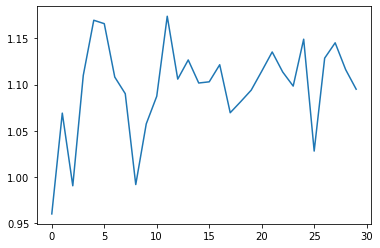

In [9]:
'''
    union_loss = 1*triplet_loss+ 0.5*pre_loss
    return union_loss

device = 'cuda:7'
batch_size = 16
epochs = 350
lr = 0.0001
decay = 1e-3
num_layer = 5
emb_dim = 300
dropout_ratio = 0
JK = 'last'
dataset = 'EAAT3'
output_model_file = ''
gnn_type = 'gin'
seed = 1
num_workers = 8
mode = 'ada_batch_all_triplet_loss'   #ada_batch_all_triplet_loss,ada_batch_hard_triplet_loss,triplet_loss
feature_type = 'custom'  #random,onehot,custom,pseudo
graph_pooling = 'set2set2' #mean,last,sum,set2set,atention
cliff_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
'''
import numpy as np
import matplotlib.pyplot as plt
#eaat3
#l = {0.1: [[0.12397763878107071, 0.15100525319576263, 0.2432694286108017, 0.8323385715484619, 0.2224656194448471], [0.42591121792793274, 0.6115905046463013, 0.6397701501846313, 0.39110496640205383, 0.6903523206710815], [0.5627261996269226, 1.0745419263839722, 0.9950058460235596, 0.780849039554596, 0.6827929019927979], [0.5234470367431641, 0.6621171236038208, 0.35246387124061584, 0.6281891465187073, 0.5414535999298096], [0.9847184419631958, 0.6829659342765808, 0.8412525653839111, 0.5300678014755249, 0.5835644006729126], [1.078069806098938, 0.590480387210846, 0.5342810750007629, 0.500374436378479, 0.8600553274154663], [0.4518831968307495, 0.4616188108921051, 0.40798795223236084, 0.3567218482494354, 0.2675700783729553], [0.5753350257873535, 0.5959947109222412, 0.8114128708839417, 0.539884626865387, 0.7645397186279297], [0.4999910593032837, 0.6055461168289185, 0.8646930456161499, 0.3861353099346161, 0.5413205623626709], [0.6592694520950317, 0.5272039771080017, 0.6207247376441956, 0.5054771304130554, 0.5194342136383057], [0.3949894905090332, 0.6088177561759949, 0.7465469241142273, 0.5097749829292297, 0.6088081002235413]], 0.2: [[0.2336755096912384, 0.7474241256713867, 0.2976728677749634, 0.22715558111667633, 0.2616965174674988], [0.9274662733078003, 0.6500252485275269, 0.4656510055065155, 0.6409144997596741, 0.4296598732471466], [0.8120025396347046, 0.6744567155838013, 0.7707133293151855, 0.9891668558120728, 1.2626464366912842], [0.3872985243797302, 0.44727274775505066, 0.589911937713623, 0.33880558609962463, 0.4906546175479889], [0.9949734807014465, 0.49706482887268066, 0.9812023639678955, 0.7287330031394958, 1.013932466506958], [1.01943838596344, 0.5127874612808228, 0.7576050758361816, 0.5812047719955444, 0.5675672888755798], [0.2619742453098297, 0.1774785816669464, 0.3986482620239258, 0.37202754616737366, 0.49611395597457886], [0.626695454120636, 0.7313365936279297, 0.6515595316886902, 0.7679478526115417, 0.7640208601951599], [0.48143479228019714, 0.37207698822021484, 0.41880303621292114, 0.42129045724868774, 0.5401152968406677], [0.6447462439537048, 0.4324846565723419, 0.46889206767082214, 0.5884189009666443, 0.4783494472503662], [0.47297075390815735, 0.686591386795044, 0.6773347854614258, 0.5241860747337341, 0.5269766449928284]], 0.3: [[0.31445586681365967, 0.6580959558486938, 0.43070188164711, 0.13141845166683197, 0.25693491101264954], [0.5284503698348999, 0.5330675840377808, 1.0739859342575073, 0.4498365819454193, 0.6753673553466797], [0.6193715929985046, 0.9316725134849548, 1.2557873725891113, 0.4888208210468292, 0.9459531307220459], [0.695399820804596, 0.38242217898368835, 0.6852057576179504, 0.38825392723083496, 0.32967111468315125], [0.7180517911911011, 1.3356999158859253, 0.4152161478996277, 0.8999656438827515, 0.5018337965011597], [0.6393924355506897, 0.7242062091827393, 0.6467846632003784, 0.5003058314323425, 0.6872326135635376], [0.3030846416950226, 0.4118184447288513, 0.45905494689941406, 0.2998233139514923, 0.21939684450626373], [0.710898756980896, 0.5665866136550903, 0.7003980875015259, 0.6703305244445801, 0.7933785915374756], [0.38963133096694946, 0.72564297914505, 0.3635992109775543, 0.5507473349571228, 0.45815983414649963], [0.656821072101593, 0.4226677417755127, 0.544633150100708, 0.5138781070709229, 0.5925003290176392], [0.5292580127716064, 0.5881364345550537, 0.6627123951911926, 0.4938637912273407, 0.49104493856430054]], 0.4: [[0.2196251004934311, 0.6018533706665039, 0.21173082292079926, 0.24865403771400452, 0.29102542996406555], [0.3954872488975525, 0.8365296125411987, 0.8610658645629883, 0.4883745610713959, 0.5186297297477722], [1.0298066139221191, 0.9641884565353394, 1.0160768032073975, 0.9924341440200806, 0.6663476824760437], [0.453673779964447, 0.635633647441864, 0.5060692429542542, 0.3966774642467499, 0.48233193159103394], [0.8305743932723999, 0.8650504350662231, 0.6148273348808289, 1.0625758171081543, 0.8562000393867493], [0.7197763323783875, 0.5872534513473511, 0.49461886286735535, 0.7459409832954407, 0.5221596956253052], [0.4006594717502594, 0.5048359632492065, 0.31071552634239197, 0.23219552636146545, 0.5769305229187012], [0.8640302419662476, 0.7833497524261475, 0.6362158060073853, 0.6404698491096497, 0.5255836844444275], [0.5042912364006042, 0.43780216574668884, 0.5052466988563538, 0.3980261981487274, 0.27865317463874817], [0.4356266260147095, 0.5191366672515869, 0.6138080358505249, 0.566870927810669, 0.6043216586112976], [0.4796649217605591, 0.572644054889679, 0.6208875775337219, 0.5218302607536316, 0.5637758374214172]], 0.5: [[0.40031954646110535, 0.289668470621109, 0.20655666291713715, 0.7373679280281067, 0.2175748497247696], [0.6694395542144775, 0.6591331362724304, 0.7511838674545288, 0.6220653653144836, 0.4321030378341675], [0.9369540214538574, 0.7140679955482483, 0.5240339636802673, 0.6534347534179688, 0.805173933506012], [0.5735974907875061, 0.5871301293373108, 0.4645339846611023, 0.38561975955963135, 0.6397466659545898], [0.8039981126785278, 0.7076743245124817, 0.7233564257621765, 0.6543746590614319, 0.6607887744903564], [0.5909443497657776, 0.5674912929534912, 0.6101014018058777, 0.6082971096038818, 0.587179958820343], [0.2663836181163788, 0.2698877155780792, 0.34392282366752625, 0.4465563893318176, 0.3808544874191284], [0.6533439755439758, 0.6630623936653137, 0.5380341410636902, 0.7193102836608887, 0.935922384262085], [0.844037652015686, 0.5863500237464905, 0.5755637884140015, 0.6156907081604004, 0.3460005223751068], [0.4712914824485779, 0.597693920135498, 0.49199435114860535, 0.6675022840499878, 0.7428022027015686], [0.4531056880950928, 0.5595855712890625, 0.6579930186271667, 0.5263628363609314, 0.6191098690032959]], 0.6: [[0.6202445030212402, 0.2202339768409729, 0.2832794189453125, 0.22314366698265076, 0.10727056115865707], [0.7501235604286194, 0.6363733410835266, 0.6414254307746887, 0.563116192817688, 0.5347751975059509], [0.4622189700603485, 0.8024576902389526, 0.6499367952346802, 0.4815415143966675, 1.077072262763977], [0.4184800386428833, 0.42772719264030457, 0.6034802794456482, 0.518912136554718, 0.638788640499115], [1.0913726091384888, 0.5654879808425903, 0.982404887676239, 0.639356791973114, 0.47132089734077454], [0.5225672125816345, 0.6521583795547485, 0.7024136781692505, 0.7224771976470947, 0.8783529996871948], [0.30437150597572327, 0.22868399322032928, 0.4118785560131073, 0.4917586147785187, 0.33481329679489136], [0.6922021508216858, 0.48175445199012756, 0.9527413249015808, 0.7464442849159241, 0.7175489068031311], [0.6356822848320007, 0.7355947494506836, 0.836304783821106, 0.5115538239479065, 0.3903571367263794], [0.6849912405014038, 0.5231912136077881, 0.7402265667915344, 0.5639374852180481, 0.5205336213111877], [0.42489543557167053, 0.5408464074134827, 0.5740745663642883, 0.5968525409698486, 0.7083960771560669]], 0.7: [[0.22638627886772156, 0.3185424506664276, 0.4274292588233948, 0.3145272135734558, 0.6284979581832886], [0.7014572620391846, 0.5336801409721375, 0.7407851219177246, 0.6105746626853943, 0.5310772657394409], [0.8040434718132019, 0.8689039945602417, 0.5237952470779419, 0.6810529232025146, 0.43598422408103943], [0.41245317459106445, 0.410705029964447, 0.45363444089889526, 0.40344157814979553, 0.665520966053009], [1.1472922563552856, 0.8550601005554199, 0.6623672842979431, 0.6454132795333862, 0.7129584550857544], [0.6684936881065369, 0.6254127025604248, 0.5963588953018188, 0.8584521412849426, 0.6158320307731628], [0.4333333373069763, 0.3733230531215668, 0.2772064805030823, 0.40056702494621277, 0.40176814794540405], [0.7605482339859009, 0.5587520003318787, 0.8035902976989746, 0.6757299304008484, 0.6875219345092773], [0.32870617508888245, 0.6539114117622375, 0.37064075469970703, 0.4182010293006897, 0.5598042607307434], [0.4402334988117218, 0.6275426149368286, 0.5168513655662537, 0.6543940901756287, 0.5901696681976318], [0.5415323376655579, 0.5989956259727478, 0.6420616507530212, 0.5578524470329285, 0.530742347240448]], 0.8: [[0.7740125060081482, 0.14129433035850525, 0.16548296809196472, 0.32771313190460205, 0.20256049931049347], [0.4803771376609802, 0.5767273306846619, 0.9963456392288208, 0.6134147644042969, 0.8732054233551025], [0.531819760799408, 0.6173689365386963, 0.5501556992530823, 0.6871675252914429, 0.8403761386871338], [0.5489740967750549, 0.5451180338859558, 0.5319928526878357, 0.41625547409057617, 0.444519579410553], [0.6930384635925293, 0.5314837098121643, 0.6431999206542969, 0.7492562532424927, 0.9345058798789978], [1.0172876119613647, 0.5200719237327576, 0.6255205869674683, 0.39878419041633606, 0.5134899616241455], [0.3543921411037445, 0.26608744263648987, 0.39790186285972595, 0.43911266326904297, 0.4469637870788574], [0.48896828293800354, 0.6567898988723755, 0.7353060245513916, 0.8199121356010437, 0.7163534164428711], [0.5143367052078247, 0.5310645699501038, 0.40351587533950806, 0.8157617449760437, 0.6485554575920105], [0.6555715799331665, 0.527972936630249, 0.6083398461341858, 0.5647303462028503, 0.5097208023071289], [0.48870450258255005, 0.5351556539535522, 0.5313103795051575, 0.778704822063446, 0.565841555595398]], 0.9: [[0.48524677753448486, 0.3652603328227997, 0.2897576689720154, 0.7586021423339844, 0.30983415246009827], [0.914152204990387, 0.4198611378669739, 0.4990684390068054, 0.6902212500572205, 0.5224934220314026], [0.9418034553527832, 0.887225329875946, 0.7184074521064758, 0.5312564969062805, 0.4780415892601013], [0.5595154166221619, 0.8584257364273071, 0.5754961967468262, 0.36288386583328247, 0.29465600848197937], [1.1142334938049316, 0.5345012545585632, 0.49014806747436523, 0.6919662952423096, 0.9588854908943176], [0.6065047979354858, 0.741762101650238, 0.6817132830619812, 0.5841001868247986, 0.6573772430419922], [0.3037196695804596, 0.4193405508995056, 0.3399970233440399, 0.32975029945373535, 0.39468914270401], [0.46706143021583557, 0.7677487730979919, 0.8639804720878601, 0.6654300093650818, 0.6564195156097412], [0.7271403074264526, 0.5605084896087646, 0.3873470425605774, 0.3373262286186218, 0.7014586925506592], [0.6107357740402222, 0.7312741875648499, 0.5122765898704529, 0.5215789675712585, 0.5420153141021729], [0.7101717591285706, 0.40033453702926636, 0.6739195585250854, 0.6043489575386047, 0.4832044243812561]], 1.0: [[0.2612375020980835, 0.7867944836616516, 0.3090147376060486, 0.2866261303424835, 0.47023242712020874], [0.5480695366859436, 0.8966577649116516, 0.6176856756210327, 0.6444160342216492, 0.4865719974040985], [0.8194372653961182, 0.3817576467990875, 0.49851760268211365, 0.5215288400650024, 0.7584672570228577], [0.6516208052635193, 0.39987796545028687, 0.49141111969947815, 0.4525948464870453, 0.33281567692756653], [1.1963216066360474, 0.667057991027832, 0.5747634172439575, 0.6012393236160278, 0.7418591380119324], [0.5187162756919861, 0.8137220740318298, 0.7396425604820251, 0.7679953575134277, 0.6214656233787537], [0.31746387481689453, 0.3323040008544922, 0.29968637228012085, 0.4651441276073456, 0.3240789771080017], [0.7653253674507141, 0.7875051498413086, 0.7191122770309448, 0.6019397974014282, 0.6928040981292725], [0.4981498420238495, 0.5281001925468445, 0.39997223019599915, 0.28501904010772705, 0.4310525059700012], [0.4770287871360779, 0.7458007335662842, 0.50002521276474, 0.65715092420578, 0.4228195250034332], [0.5562529563903809, 0.5259125232696533, 0.7196158170700073, 0.5791592001914978, 0.5336894989013672]], 1.1: [[0.29280969500541687, 0.7789055705070496, 0.14885123074054718, 0.23283563554286957, 0.32813993096351624], [0.2869134843349457, 0.6617459654808044, 0.6690549254417419, 0.6291066408157349, 0.5613298416137695], [0.9075039625167847, 0.6874545812606812, 1.147326946258545, 0.5976018905639648, 0.7842570543289185], [0.39145222306251526, 0.4298091530799866, 0.38857191801071167, 0.757784903049469, 0.4906980097293854], [1.0421427488327026, 0.6236832141876221, 0.5675691962242126, 0.879477858543396, 0.6376317143440247], [0.695090651512146, 0.9845767617225647, 0.6121845841407776, 0.5925400853157043, 0.6128994822502136], [0.3062496483325958, 0.4053690731525421, 0.38995763659477234, 0.37033697962760925, 0.31984415650367737], [0.6746665239334106, 0.6281108260154724, 0.8144594430923462, 0.6805522441864014, 0.7098712921142578], [0.4984024167060852, 0.5457757711410522, 0.3511740565299988, 0.37310707569122314, 0.353045254945755], [0.544158399105072, 0.694634735584259, 0.5179913640022278, 0.46245431900024414, 0.5407206416130066], [0.5971302390098572, 0.6076690554618835, 0.6003172993659973, 0.5882864594459534, 0.4457722306251526]], 1.2: [[0.33244040608406067, 0.7537527084350586, 0.08483294397592545, 0.21789337694644928, 0.2300601303577423], [0.354695200920105, 0.680575966835022, 1.1556751728057861, 0.42274701595306396, 0.749739408493042], [0.6429845094680786, 0.7065490484237671, 0.863658607006073, 0.643871009349823, 0.8472562432289124], [0.5436205863952637, 0.365465372800827, 0.7259902358055115, 0.43928074836730957, 0.46896058320999146], [0.9355362057685852, 0.41600659489631653, 0.4569520652294159, 1.0472387075424194, 0.5646357536315918], [0.4367413818836212, 0.9137197136878967, 0.6612631678581238, 0.5962451696395874, 0.7414207458496094], [0.2812325358390808, 0.29725027084350586, 0.35219720005989075, 0.45652347803115845, 0.4647611379623413], [0.7280979752540588, 0.6948553323745728, 0.9362837672233582, 0.7103440761566162, 0.5810927152633667], [0.4918154776096344, 0.5374050140380859, 0.734263002872467, 0.3061472177505493, 0.7591434121131897], [0.5162990093231201, 0.8174645304679871, 0.4197503328323364, 0.6038436889648438, 0.4702770411968231], [0.4376871585845947, 0.5910468697547913, 0.5034115314483643, 0.5622773766517639, 0.7308247685432434]], 1.3: [[0.2523995637893677, 0.5891028046607971, 0.15910622477531433, 0.7054859399795532, 0.3699212968349457], [0.5722522735595703, 0.99514240026474, 0.4901304543018341, 0.9078836441040039, 0.41030263900756836], [0.8953038454055786, 1.0457459688186646, 0.5377198457717896, 0.7105474472045898, 0.9058374762535095], [0.4021711051464081, 0.7041290998458862, 0.38135409355163574, 0.398174524307251, 0.5067793130874634], [0.5593072772026062, 0.8545234799385071, 0.8724592924118042, 0.7045527100563049, 0.6302757859230042], [0.6270543336868286, 0.5192127227783203, 0.8402576446533203, 0.47914940118789673, 0.7051337957382202], [0.35363873839378357, 0.3616156578063965, 0.34764552116394043, 0.6200823187828064, 0.2763921320438385], [0.8172374367713928, 0.6424151062965393, 0.7413703203201294, 0.7669968605041504, 0.5797871351242065], [0.631416380405426, 0.593714714050293, 0.5158709287643433, 0.3825130760669708, 0.5169323682785034], [0.6221160888671875, 0.582064151763916, 0.4666702151298523, 0.46627774834632874, 0.5745982527732849], [0.6107575297355652, 0.5582275390625, 0.5547906756401062, 0.6457091569900513, 0.5038462281227112]], 1.4: [[0.5566740036010742, 0.1422295719385147, 0.30360230803489685, 0.4551464915275574, 0.6838024854660034], [0.6256067752838135, 0.575598955154419, 0.7273609042167664, 0.5694742202758789, 0.5278879404067993], [0.854055643081665, 0.47624364495277405, 0.5708228945732117, 0.8614829778671265, 0.5802626609802246], [0.5253689289093018, 0.3748186230659485, 0.41149598360061646, 0.586607038974762, 0.4363937973976135], [0.7358627915382385, 0.5547204613685608, 0.8596965670585632, 0.589330792427063, 1.0454130172729492], [0.5460168123245239, 0.685066819190979, 0.784957766532898, 0.5859540700912476, 0.7353312373161316], [0.46440500020980835, 0.39632007479667664, 0.4066970646381378, 0.2622637152671814, 0.20726795494556427], [0.5658537149429321, 0.6847867369651794, 0.7589511275291443, 0.6452775001525879, 0.6707755327224731], [0.47113850712776184, 0.6731081604957581, 0.5857222676277161, 0.7385859489440918, 0.7485325932502747], [0.6159434914588928, 0.6404787302017212, 0.7286928296089172, 0.5063621997833252, 0.5489320158958435], [0.5951685309410095, 0.4579295814037323, 0.6321542263031006, 0.5017033815383911, 0.5265341997146606]], 1.5: [[0.22962892055511475, 0.7051419019699097, 0.1475575715303421, 0.14502328634262085, 0.25153136253356934], [0.6914840340614319, 1.0251319408416748, 0.39228489995002747, 0.7117183208465576, 0.34054481983184814], [0.7019254565238953, 0.6696156859397888, 0.5987426042556763, 0.9046393632888794, 0.8230721950531006], [0.45199260115623474, 0.5032418370246887, 0.4107968807220459, 0.5973684191703796, 0.4901198744773865], [0.5846192836761475, 0.716524600982666, 0.679003119468689, 0.7762263417243958, 0.7853996157646179], [0.8564292192459106, 0.5250738263130188, 0.5371695756912231, 0.6429815888404846, 0.686667263507843], [0.2799347937107086, 0.43533018231391907, 0.3627793490886688, 0.28642743825912476, 0.3445397913455963], [0.7299197316169739, 0.6908347606658936, 0.9536877274513245, 0.691962718963623, 0.6484658718109131], [0.34486013650894165, 0.7034128904342651, 0.5432794690132141, 0.4163396656513214, 0.5702541470527649], [0.44417572021484375, 0.646334171295166, 0.43137621879577637, 0.5744956135749817, 0.5207122564315796], [0.5569888353347778, 0.5748344659805298, 0.639999508857727, 0.39528757333755493, 0.5930681824684143]], 1.6: [[0.1492825597524643, 0.28997603058815, 0.18107610940933228, 0.3854432702064514, 0.7268867492675781], [0.781776487827301, 0.6720449924468994, 0.41517797112464905, 0.8075807094573975, 0.4577447474002838], [0.7986394762992859, 0.4323751926422119, 0.5884270071983337, 0.6120346784591675, 0.8283798098564148], [0.5104088187217712, 0.5851128697395325, 0.36793598532676697, 0.4489932954311371, 0.45335328578948975], [0.5038900375366211, 0.8452376127243042, 0.9353786706924438, 1.04790198802948, 0.8210131525993347], [0.6781308650970459, 0.46367350220680237, 0.5343503355979919, 0.7462575435638428, 0.8354598879814148], [0.27920177578926086, 0.2501208484172821, 0.2670634984970093, 0.4126834273338318, 0.5205696821212769], [0.6883460879325867, 0.7845655083656311, 0.5713406801223755, 0.974504828453064, 0.442550390958786], [0.3400513827800751, 0.6397212743759155, 0.6057710647583008, 0.38888534903526306, 0.5217182636260986], [0.7222604751586914, 0.4190887212753296, 0.5727864503860474, 0.7052144408226013, 0.4601023495197296], [0.5315353274345398, 0.5236206650733948, 0.5869588255882263, 0.5809351205825806, 0.47538745403289795]], 1.7: [[0.40281981229782104, 0.7836496233940125, 0.125979945063591, 0.30502671003341675, 0.03804349899291992], [0.3674984276294708, 0.7921152114868164, 0.4124548137187958, 0.5268252491950989, 0.4792454242706299], [0.8214815258979797, 0.3483083248138428, 0.939739465713501, 0.9249487519264221, 0.6607836484909058], [0.41142746806144714, 0.5683590769767761, 0.35651612281799316, 0.6377455592155457, 0.34593942761421204], [0.6787636876106262, 0.9189991354942322, 0.685523509979248, 1.0534886121749878, 0.647156834602356], [0.5998097658157349, 0.8198886513710022, 0.7443019151687622, 0.7519736289978027, 0.6137438416481018], [0.337981641292572, 0.3223593533039093, 0.3909091055393219, 0.2623957693576813, 0.7589489221572876], [0.607230007648468, 0.6651015281677246, 0.7299961447715759, 0.8454961776733398, 0.5337992310523987], [0.5112002491950989, 0.5793274641036987, 0.5000244379043579, 0.4871898591518402, 0.5298241972923279], [0.5022046566009521, 0.5563812851905823, 0.6321656703948975, 0.5245649814605713, 0.545184850692749], [0.5455477833747864, 0.4518626928329468, 0.5811878442764282, 0.5779284834861755, 0.6669732928276062]], 1.8: [[0.3967491388320923, 0.4073173403739929, 0.7138261198997498, 0.27801886200904846, 0.15440352261066437], [0.4143168330192566, 0.6942169070243835, 0.6313847303390503, 1.08760666847229, 0.3224698007106781], [0.8297804594039917, 1.1627308130264282, 0.7602115869522095, 0.6527681946754456, 0.608674943447113], [0.40566715598106384, 0.571421205997467, 0.30908021330833435, 0.5450802445411682, 0.5708591938018799], [0.6942017674446106, 0.7507432699203491, 0.498379111289978, 0.6667476892471313, 0.7610562443733215], [0.8193191289901733, 0.5748727917671204, 0.7348954677581787, 0.6521868109703064, 0.6352709531784058], [0.26389065384864807, 0.40967217087745667, 0.28609344363212585, 0.5224615931510925, 0.31560060381889343], [0.713540256023407, 0.7129493951797485, 0.5156469941139221, 0.8255293369293213, 0.7218020558357239], [0.46696606278419495, 0.2582738995552063, 0.2712059020996094, 0.9080386161804199, 0.3225141763687134], [0.5308100581169128, 0.5883811116218567, 0.42571622133255005, 0.7763359546661377, 0.5576008558273315], [0.4020015299320221, 0.5328675508499146, 0.447604238986969, 0.6462573409080505, 0.6123709082603455]], 1.9: [[0.16554829478263855, 0.3385166525840759, 0.679721474647522, 0.3439582288265228, 0.43323689699172974], [0.5177922248840332, 0.6632387042045593, 0.44185125827789307, 0.8572537899017334, 0.5537655353546143], [1.1058052778244019, 0.974875271320343, 0.4080403447151184, 0.5563015937805176, 0.7854694724082947], [0.5439863801002502, 0.3780187666416168, 0.4994189739227295, 0.4285636246204376, 0.5837721824645996], [0.5209636688232422, 0.7522507309913635, 0.792918860912323, 0.7459990978240967, 0.8483180999755859], [0.5538175702095032, 0.6527056694030762, 0.5856634378433228, 0.7019763588905334, 0.825595498085022], [0.3701925575733185, 0.3504736125469208, 0.36598894000053406, 0.20733797550201416, 0.332225501537323], [0.5998708009719849, 0.932866632938385, 0.7742215991020203, 0.6620256304740906, 0.5153840184211731], [0.46468842029571533, 0.4267719089984894, 0.3339901566505432, 1.0047367811203003, 0.4088858664035797], [0.4607331156730652, 0.5652888417243958, 0.5168570280075073, 0.7449206709861755, 0.5605257153511047], [0.667472243309021, 0.6725266575813293, 0.43501782417297363, 0.612389087677002, 0.4625091254711151]], 2.0: [[0.74969482421875, 0.24501124024391174, 0.21188215911388397, 0.1466214507818222, 0.3107715845108032], [0.8310464024543762, 0.3271465301513672, 0.7265721559524536, 0.4227065443992615, 0.5998575687408447], [0.487804114818573, 1.0301358699798584, 0.5275141000747681, 0.5967096090316772, 0.3364936411380768], [0.5355952978134155, 0.4393366575241089, 0.4303922653198242, 0.5163341164588928, 0.46226030588150024], [0.7488303780555725, 0.7409128546714783, 0.6168394684791565, 0.6101533770561218, 0.8454993963241577], [0.5018780827522278, 0.8291093111038208, 0.7303076386451721, 0.5885809659957886, 0.7759172320365906], [0.4834534525871277, 0.3049432933330536, 0.4200524389743805, 0.35824206471443176, 0.2762068212032318], [0.5761578679084778, 0.7702657580375671, 0.7754343748092651, 0.8212365508079529, 0.8538708090782166], [0.5067891478538513, 0.5281206965446472, 0.6194416880607605, 0.34829550981521606, 0.6396663784980774], [0.5835410356521606, 0.43765735626220703, 0.5819658041000366, 0.6979329586029053, 0.6534641981124878], [0.5093815326690674, 0.570903480052948, 0.6161438226699829, 0.6548651456832886, 0.522260844707489]], 2.1: [[0.2549183964729309, 0.12162408232688904, 0.6490666270256042, 0.2347870171070099, 0.11236568540334702], [0.6119094491004944, 0.5559883713722229, 0.6080605387687683, 0.9930291771888733, 0.5863198041915894], [0.8562428951263428, 0.4432153105735779, 0.6623136401176453, 1.0980751514434814, 0.5840148329734802], [0.5142179727554321, 0.43466633558273315, 0.4672679603099823, 0.5526513457298279, 0.4366135001182556], [0.7407687306404114, 1.1517231464385986, 0.7106550931930542, 0.6245871186256409, 0.5714054703712463], [0.47168079018592834, 0.5713080763816833, 0.7055038213729858, 0.9458999037742615, 0.7322825193405151], [0.3858875036239624, 0.33269834518432617, 0.34197747707366943, 0.4542195796966553, 0.39607906341552734], [0.9463690519332886, 0.6406528949737549, 0.5303635597229004, 0.8408346772193909, 0.46176713705062866], [0.28664693236351013, 0.4331232011318207, 0.44779810309410095, 0.7376220226287842, 0.44252052903175354], [0.6321240663528442, 0.451663613319397, 0.5743752717971802, 0.7361706495285034, 0.3817419409751892], [0.5203853845596313, 0.5095843076705933, 0.5756596326828003, 0.5213004946708679, 0.5893584489822388]], 2.2: [[0.48274871706962585, 0.7469790577888489, 0.21198777854442596, 0.22883151471614838, 0.22740906476974487], [0.6363047957420349, 0.960955023765564, 0.3982113301753998, 0.710986316204071, 0.3225058913230896], [0.730430006980896, 1.0724784135818481, 0.8037147521972656, 1.0642403364181519, 0.6836086511611938], [0.5620570182800293, 0.6771070957183838, 0.3061158359050751, 0.38166365027427673, 0.5074423551559448], [0.8966334462165833, 1.119004726409912, 1.024228811264038, 0.7658778429031372, 0.8225330114364624], [0.47491809725761414, 0.63801109790802, 0.5586588978767395, 0.8072716593742371, 0.873276948928833], [0.4573824405670166, 0.23922628164291382, 0.2777389585971832, 0.36499693989753723, 0.32947036623954773], [0.6846450567245483, 0.6214614510536194, 0.8118242621421814, 0.7502476572990417, 0.9132188558578491], [0.6096439957618713, 0.3625871241092682, 0.5072345733642578, 0.4188219904899597, 0.7862364649772644], [0.5595624446868896, 0.5413495898246765, 0.7265787720680237, 0.48226702213287354, 0.34359797835350037], [0.5609471797943115, 0.5079188942909241, 0.6296918988227844, 0.5137955546379089, 0.5740938186645508]], 2.3: [[0.5586276054382324, 0.06800311803817749, 0.22752371430397034, 0.21585388481616974, 0.12536220252513885], [0.766783595085144, 0.4781254231929779, 0.6723602414131165, 0.5120963454246521, 1.0323879718780518], [0.7697127461433411, 0.812608540058136, 0.4619728922843933, 0.3510934114456177, 0.9843625426292419], [0.45124056935310364, 0.8139668703079224, 0.5313687324523926, 0.40048104524612427, 0.5068709254264832], [0.5653294920921326, 1.0595951080322266, 0.6650711297988892, 0.5915372967720032, 0.7889901399612427], [0.6191633343696594, 0.8359531164169312, 0.8137798309326172, 0.7347087264060974, 0.541769802570343], [0.47271159291267395, 0.4040081202983856, 0.7297816872596741, 0.33992382884025574, 0.3656269311904907], [0.614412248134613, 0.7032396197319031, 0.6260008215904236, 0.7371987104415894, 0.6451166868209839], [0.4884594678878784, 0.4850085973739624, 0.5488015413284302, 0.35327914357185364, 0.5141147375106812], [0.7501397728919983, 0.3808309733867645, 0.5494004487991333, 0.6875150799751282, 0.5516517758369446], [0.6383830308914185, 0.5311004519462585, 0.5853135585784912, 0.5097396969795227, 0.39235275983810425]], 2.4: [[0.2986803352832794, 0.4943147897720337, 0.1854258030653, 0.759462833404541, 0.3547065854072571], [0.44528117775917053, 0.4203668534755707, 0.9291878342628479, 0.6913034915924072, 0.9598332047462463], [0.5252888202667236, 0.9938570261001587, 0.7417477369308472, 0.8638406991958618, 0.6001241207122803], [0.4968265891075134, 0.47058114409446716, 0.4120263159275055, 0.6066201329231262, 0.3377905488014221], [0.5487420558929443, 0.525585949420929, 1.3237327337265015, 0.9631343483924866, 0.8801974654197693], [0.7062683701515198, 0.7005217671394348, 0.8474496006965637, 0.5498708486557007, 0.6556119322776794], [0.33687376976013184, 0.32937246561050415, 0.38195928931236267, 0.3706128001213074, 0.27512606978416443], [0.5651013851165771, 0.710206151008606, 0.6162631511688232, 0.8022154569625854, 0.7126019597053528], [0.6171814203262329, 0.5276421308517456, 0.3612798750400543, 0.3772691786289215, 0.7316910624504089], [0.6686455011367798, 0.5418779253959656, 0.5845391750335693, 0.35478475689888, 0.6052988171577454], [0.6527764201164246, 0.5992556810379028, 0.5013786554336548, 0.4999265968799591, 0.5293412208557129]], 2.5: [[0.23954759538173676, 0.18556548655033112, 0.3550601005554199, 0.24406887590885162, 0.7426437735557556], [0.7097824215888977, 0.7572735548019409, 0.5130911469459534, 0.46653684973716736, 0.7600353360176086], [0.46659547090530396, 0.5575311779975891, 0.7148844599723816, 0.7808282375335693, 0.49492788314819336], [0.4923207461833954, 0.587820291519165, 0.31783223152160645, 0.4277821183204651, 0.5265793800354004], [0.8056385517120361, 1.2839014530181885, 0.5587001442909241, 1.0684378147125244, 0.6584731340408325], [0.9702637195587158, 0.6022818684577942, 0.5403255224227905, 0.5884425640106201, 0.6023014783859253], [0.24155333638191223, 0.3778018057346344, 0.4014466106891632, 0.2283136546611786, 0.40804776549339294], [0.6098595261573792, 0.8153217434883118, 0.7644058465957642, 0.61207115650177, 0.7812524437904358], [0.5013689398765564, 0.6009811162948608, 0.5616732239723206, 0.3462975025177002, 0.44072774052619934], [0.6762148141860962, 0.5500707626342773, 0.5029578804969788, 0.7030154466629028, 0.42692434787750244], [0.5615878701210022, 0.611146092414856, 0.5134297013282776, 0.5465536117553711, 0.6141701340675354]], 2.6: [[0.28951865434646606, 0.8555763959884644, 0.30629515647888184, 0.3302428126335144, 0.2698947489261627], [0.525383710861206, 0.6554595828056335, 0.6897677183151245, 0.5465304851531982, 0.7210575938224792], [0.6729831695556641, 0.6677351593971252, 0.7141549587249756, 0.746959388256073, 0.9537131190299988], [0.38137590885162354, 0.41597244143486023, 0.7411270141601562, 0.38454148173332214, 0.5339109897613525], [0.7167503237724304, 0.8424529433250427, 0.9128121733665466, 0.6425129175186157, 0.7919681668281555], [0.5845944881439209, 0.7446374297142029, 0.7790845036506653, 0.5692737102508545, 0.6562092900276184], [0.2784971296787262, 0.21441879868507385, 0.3287472128868103, 0.469048410654068, 0.3465859889984131], [0.6807588338851929, 0.6459937691688538, 0.8998819589614868, 0.8516471982002258, 0.6770970821380615], [0.4148142337799072, 0.3561621904373169, 0.7288945913314819, 0.22605155408382416, 0.39560750126838684], [0.47623828053474426, 0.5683984160423279, 0.469147652387619, 0.6505067348480225, 0.694469153881073], [0.5310623049736023, 0.6736111640930176, 0.49990272521972656, 0.4123600423336029, 0.6324951648712158]], 2.7: [[0.7890250086784363, 0.42524638772010803, 0.26149094104766846, 0.18680207431316376, 0.3974721431732178], [0.45791542530059814, 0.4334201514720917, 0.8314453363418579, 0.5221638083457947, 0.40272918343544006], [0.7224472761154175, 0.47770580649375916, 0.6831164360046387, 0.8120055794715881, 1.4443873167037964], [0.495326429605484, 0.4683173596858978, 0.5950607061386108, 0.4400121867656708, 0.4971480965614319], [0.8278077244758606, 0.7600678205490112, 0.9580766558647156, 1.2492815256118774, 0.8019516468048096], [0.8723141551017761, 0.6291217803955078, 0.6505034565925598, 0.6243014931678772, 0.5718928575515747], [0.7595288753509521, 0.3532717227935791, 0.3047412037849426, 0.3030392825603485, 0.46554088592529297], [0.7508552074432373, 0.730029284954071, 0.5501827597618103, 0.7853912711143494, 0.5161928534507751], [0.3395037353038788, 0.366180956363678, 0.7942575812339783, 0.6712049841880798, 0.42974600195884705], [0.8144088387489319, 0.5744802355766296, 0.4859991669654846, 0.500892162322998, 0.6108816266059875], [0.4728839695453644, 0.5181257724761963, 0.5494694709777832, 0.5307691693305969, 0.6639127731323242]], 2.8: [[0.2819100618362427, 0.32677534222602844, 0.18219569325447083, 0.3496796488761902, 0.8723957538604736], [0.3350335359573364, 0.4805104732513428, 0.4964686334133148, 0.6074210405349731, 0.8893020153045654], [0.7215623259544373, 0.6801574230194092, 0.5409870743751526, 0.9487513303756714, 1.0415127277374268], [0.4099068343639374, 0.6800746917724609, 0.37731531262397766, 0.8833209872245789, 0.3704167604446411], [0.8347504138946533, 0.7974139451980591, 0.7447270154953003, 0.808139443397522, 0.5302242636680603], [0.7854112386703491, 0.8170949220657349, 0.7685040235519409, 0.7552616596221924, 0.5284755229949951], [0.3436537981033325, 0.46994197368621826, 0.543639063835144, 0.44989439845085144, 0.3184863328933716], [0.7002835869789124, 0.39708346128463745, 0.6525793671607971, 0.7053729891777039, 0.9292799830436707], [0.3395061492919922, 0.8577405214309692, 0.3544088304042816, 0.4539841115474701, 0.4346802532672882], [0.4728894829750061, 0.5395920276641846, 0.36019131541252136, 0.4582519233226776, 0.6667649745941162], [0.5498601198196411, 0.534007728099823, 0.5794678330421448, 0.5619621276855469, 0.5961635708808899]], 2.9: [[0.5054571032524109, 0.25903046131134033, 0.805530309677124, 0.2995404899120331, 0.38106784224510193], [0.6500326991081238, 0.6108748912811279, 0.623468279838562, 0.5477855205535889, 0.43733489513397217], [1.1315120458602905, 1.1217238903045654, 0.5359688401222229, 1.0947580337524414, 0.31320950388908386], [0.5696039199829102, 0.5488796234130859, 0.36943358182907104, 0.44202157855033875, 0.5887027382850647], [0.8361473679542542, 1.2782970666885376, 0.8111287355422974, 0.6429754495620728, 0.7133532166481018], [0.7657560706138611, 0.7408633232116699, 0.6646921038627625, 0.5902052521705627, 0.8662197589874268], [0.31238168478012085, 0.31563207507133484, 0.4218049943447113, 0.4877154529094696, 0.39317619800567627], [0.4572717547416687, 0.7331446409225464, 0.6123430132865906, 0.7865188121795654, 0.5662778615951538], [0.7611578702926636, 0.3541807234287262, 0.48607656359672546, 0.4655160903930664, 0.5104544758796692], [0.477910578250885, 0.7441249489784241, 0.5005201697349548, 0.4298679232597351, 0.5730769038200378], [0.5897409319877625, 0.5639058947563171, 0.5308769941329956, 0.6184983253479004, 0.5349267721176147]], 3.0: [[0.2391221523284912, 0.5334568023681641, 0.34278860688209534, 0.7915151119232178, 0.33039817214012146], [0.627901554107666, 0.5773975253105164, 0.8317132592201233, 0.4105643332004547, 0.6983739733695984], [0.5174320936203003, 1.102521538734436, 1.1262385845184326, 0.9232125878334045, 0.6572669148445129], [0.5551388263702393, 0.41017791628837585, 0.4153788387775421, 0.5720483064651489, 0.5892519354820251], [0.6669826507568359, 0.5476208925247192, 0.8880133628845215, 0.7106655836105347, 0.7191926836967468], [0.8912965655326843, 0.599859356880188, 0.6114110946655273, 0.6615050435066223, 0.4662206470966339], [0.47433552145957947, 0.2844178378582001, 0.2492016702890396, 0.3878600597381592, 0.3661307990550995], [0.6781592965126038, 0.6667590737342834, 0.8492118716239929, 0.5477219820022583, 0.7005667686462402], [0.3645348846912384, 0.5341761708259583, 0.4803594946861267, 0.5326524972915649, 0.32193276286125183], [0.5827804207801819, 0.583903968334198, 0.7559365630149841, 0.3920358419418335, 0.42982205748558044], [0.5657994747161865, 0.36865702271461487, 0.601465106010437, 0.6383219957351685, 0.6529444456100464]]}
cliff_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 
              1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
# m l = {0.1: [[0.9422396456494051, 0.8378364221722472, 1.0591652218033285, 0.9437390425625969, 1.015659653672985]], 0.2: [[1.1622579144496543, 1.0983256101608276, 1.0083613313880622, 1.0693031140402252, 1.0068431192753362]], 0.3: [[1.039478408355339, 0.9780350444363612, 0.8956585573215111, 1.0950852726020066, 0.942913788206437]], 0.4: [[1.1750253064959657, 1.046621952571121, 1.1368698676427205, 1.084807409959681, 1.1064596456639908]], 0.5: [[1.2985183865416283, 1.132361472821703, 1.2321788423201616, 1.1559145929766637, 1.0297166798629014]], 0.6: [[1.2538470988180124, 1.1658757691289865, 1.4112350122601378, 0.9465975808162316, 1.0526282483456182]], 0.7: [[1.0851860467125387, 1.084913808925479, 1.1503691836899401, 1.2235740469951255, 0.9966280390234554]], 0.8: [[1.0610379529934304, 0.8072457383660709, 1.1489182219785803, 1.389123654833027, 1.0441349814919865]], 0.9: [[1.0368603643249064, 1.017834600280313, 0.88715174852633, 0.9736101428667704, 1.0424324694801779]], 1.0: [[1.0658202814120872, 1.0991452488244748, 1.1831194279240627, 1.134965343802583, 0.8039071852085637]], 1.1: [[1.0546187244209588, 0.9977903202468273, 1.1021642147326003, 1.1462567460303212, 1.1357232378978355]], 1.2: [[1.2131807243122774, 1.1416803411408967, 1.277835904383192, 1.0934438611946853, 1.1442626808203904]], 1.3: [[1.1121924227359248, 1.1461239679186952, 1.0767277794725754, 1.112888824705984, 1.0816781287099801]], 1.4: [[1.1857001313976212, 0.9486147889903948, 1.202524478529014, 1.1345725713991652, 1.1619591525956696]], 1.5: [[0.9544184441659965, 1.2639761859295415, 1.1780011209787107, 0.9860303156516131, 1.125988483428955]], 1.6: [[1.105811379703821, 1.1197190448349597, 1.2607050386129641, 0.9839440280315923, 1.0446728269259136]], 1.7: [[1.0035578561764138, 1.1548186423731785, 1.1149299378488577, 1.1580268682218064, 1.1762079654955397]], 1.8: [[1.1807268834581561, 0.9380460404882244, 1.1595009939343321, 1.0889550564335841, 0.9800166452632231]], 1.9: [[0.9801185037575516, 1.1422755624733718, 1.0131232960551393, 1.1542350661520864, 1.1176857971677594]], 2.0: [[1.4058561348447614, 0.9622750258913227, 0.9790755907694498, 0.9889058996649349, 1.1335811685113346]], 2.1: [[1.3507833924948, 1.1097286530569488, 1.1418752062554454, 1.0490115016114478, 0.9206597080417708]], 2.2: [[1.1911564036911608, 1.1497970632478303, 1.126010062647801, 1.0595685325416864, 1.1502515591827094]], 2.3: [[1.2081344080906289, 1.1152330403234445, 1.1724085527307846, 1.0872063122543634, 0.9852478118503795]], 2.4: [[0.8836191997808569, 1.5535625032350129, 1.1912773029476988, 1.0427018894868738, 0.8205768547806085]], 2.5: [[1.2218308121550316, 1.216718458661846, 1.227012454294691, 1.0784595597024058, 1.0019086622724347]], 2.6: [[1.0713584177634294, 0.8148381347749748, 1.1906813125984341, 0.9271710982509688, 1.135356772179697]], 2.7: [[1.3403491950502582, 1.1126786821028765, 0.9492210500380572, 1.2413357613133449, 0.9996543503275105]], 2.8: [[1.24956326157439, 1.0963391836951761, 1.2447933449464685, 1.0404603843595468, 1.0952023898853975]], 2.9: [[1.2211310442756205, 1.1198512900109385, 1.0824289392022526, 1.0998868100783403, 1.0576700112398933]], 3.0: [[0.9656026293249691, 1.0591171044929355, 1.2123670320884854, 1.1418262685046476, 1.0959433410681931]]}
l = {0.1: [[0.9422396456494051, 0.8378364221722472, 1.0591652218033285, 0.9437390425625969, 1.015659653672985]], 0.2: [[1.1622579144496543, 1.0983256101608276, 1.0083613313880622, 1.0693031140402252, 1.0068431192753362]], 0.3: [[1.039478408355339, 0.9780350444363612, 0.8956585573215111, 1.0950852726020066, 0.942913788206437]], 0.4: [[1.1750253064959657, 1.046621952571121, 1.1368698676427205, 1.084807409959681, 1.1064596456639908]], 0.5: [[1.2985183865416283, 1.132361472821703, 1.2321788423201616, 1.1559145929766637, 1.0297166798629014]], 0.6: [[1.2538470988180124, 1.1658757691289865, 1.4112350122601378, 0.9465975808162316, 1.0526282483456182]], 0.7: [[1.0851860467125387, 1.084913808925479, 1.1503691836899401, 1.2235740469951255, 0.9966280390234554]], 0.8: [[1.0610379529934304, 0.8072457383660709, 1.1489182219785803, 1.389123654833027, 1.0441349814919865]], 0.9: [[1.0368603643249064, 1.017834600280313, 0.88715174852633, 0.9736101428667704, 1.0424324694801779]], 1.0: [[1.0658202814120872, 1.0991452488244748, 1.1831194279240627, 1.134965343802583, 0.8039071852085637]], 1.1: [[1.0546187244209588, 0.9977903202468273, 1.1021642147326003, 1.1462567460303212, 1.1357232378978355]], 1.2: [[1.2131807243122774, 1.1416803411408967, 1.277835904383192, 1.0934438611946853, 1.1442626808203904]], 1.3: [[1.1121924227359248, 1.1461239679186952, 1.0767277794725754, 1.112888824705984, 1.0816781287099801]], 1.4: [[1.1857001313976212, 0.9486147889903948, 1.202524478529014, 1.1345725713991652, 1.1619591525956696]], 1.5: [[0.9544184441659965, 1.2639761859295415, 1.1780011209787107, 0.9860303156516131, 1.125988483428955]], 1.6: [[1.105811379703821, 1.1197190448349597, 1.2607050386129641, 0.9839440280315923, 1.0446728269259136]], 1.7: [[1.0035578561764138, 1.1548186423731785, 1.1149299378488577, 1.1580268682218064, 1.1762079654955397]], 1.8: [[1.1807268834581561, 0.9380460404882244, 1.1595009939343321, 1.0889550564335841, 0.9800166452632231]], 1.9: [[0.9801185037575516, 1.1422755624733718, 1.0131232960551393, 1.1542350661520864, 1.1176857971677594]], 2.0: [[1.4058561348447614, 0.9622750258913227, 0.9790755907694498, 0.9889058996649349, 1.1335811685113346]], 2.1: [[1.3507833924948, 1.1097286530569488, 1.1418752062554454, 1.0490115016114478, 0.9206597080417708]], 2.2: [[1.1911564036911608, 1.1497970632478303, 1.126010062647801, 1.0595685325416864, 1.1502515591827094]], 2.3: [[1.2081344080906289, 1.1152330403234445, 1.1724085527307846, 1.0872063122543634, 0.9852478118503795]], 2.4: [[0.8836191997808569, 1.5535625032350129, 1.1912773029476988, 1.0427018894868738, 0.8205768547806085]], 2.5: [[1.2218308121550316, 1.216718458661846, 1.227012454294691, 1.0784595597024058, 1.0019086622724347]], 2.6: [[1.0713584177634294, 0.8148381347749748, 1.1906813125984341, 0.9271710982509688, 1.135356772179697]], 2.7: [[1.3403491950502582, 1.1126786821028765, 0.9492210500380572, 1.2413357613133449, 0.9996543503275105]], 2.8: [[1.24956326157439, 1.0963391836951761, 1.2447933449464685, 1.0404603843595468, 1.0952023898853975]], 2.9: [[1.2211310442756205, 1.1198512900109385, 1.0824289392022526, 1.0998868100783403, 1.0576700112398933]], 3.0: [[0.9656026293249691, 1.0591171044929355, 1.2123670320884854, 1.1418262685046476, 1.0959433410681931]]}

data_dict = {}
for i in range(0,1):
    data_dict[i] = []
for cliff in cliff_list:
    for i in range(len(l[cliff])):
        k=np.array(l[cliff][i]).mean()
        data_dict[i].append(k)
print(data_dict)


for i in range(0,1):
    plt.figure(i)
    plt.plot(data_dict[i])
    #plt.savefig('./paper/try2_eaat3'+'.jpg')
    plt.show(i)
    plt.close(i)

{0: [0.5520610094070435, 0.5439798593521118, 0.5356472492218017, 0.5490527033805848, 0.5349657535552979, 0.5462828159332276, 0.5380566596984864, 0.5479766547679901, 0.5277982771396637, 0.5385967016220092, 0.5367830634117127, 0.5434560418128968, 0.5454367518424987, 0.527163302898407, 0.5359822452068329, 0.531588077545166, 0.5293602347373962, 0.5275687456130982, 0.5333246707916259, 0.5447776615619659, 0.5382243692874908, 0.5363017380237579, 0.5314966261386871, 0.5386335551738739, 0.552283775806427, 0.5399735629558563, 0.5379298806190491, 0.5508622765541077, 0.5479566514492035, 0.551971709728241]}


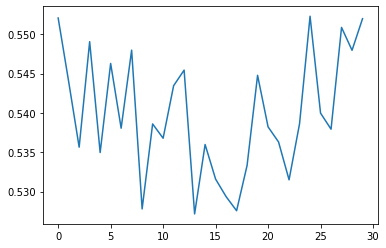

In [10]:
'''
BATCH16LR0.0001震荡很大，接下来试试32，0，00001和attensrion
     union_loss = 1*triplet_loss+ 0.5*pre_loss
    return union_loss

device = 'cuda:7'
batch_size = 16
epochs = 200
lr = 0.0001
decay = 1e-3
num_layer = 5
emb_dim = 300
dropout_ratio = 0
JK = 'last'
dataset = 'EAAT3'
output_model_file = ''
gnn_type = 'gin'
seed = 0
num_workers = 8
mode = 'ada_batch_all_triplet_loss'   #ada_batch_all_triplet_loss,ada_batch_hard_triplet_loss,triplet_loss
feature_type = 'custom'  #random,onehot,custom,pseudo
graph_pooling = 'set2set2' #mean,last,sum,set2set,atention'''
import numpy as np
import matplotlib.pyplot as plt
#eaat3
#l = {0.1: [[0.12397763878107071, 0.15100525319576263, 0.2432694286108017, 0.8323385715484619, 0.2224656194448471], [0.42591121792793274, 0.6115905046463013, 0.6397701501846313, 0.39110496640205383, 0.6903523206710815], [0.5627261996269226, 1.0745419263839722, 0.9950058460235596, 0.780849039554596, 0.6827929019927979], [0.5234470367431641, 0.6621171236038208, 0.35246387124061584, 0.6281891465187073, 0.5414535999298096], [0.9847184419631958, 0.6829659342765808, 0.8412525653839111, 0.5300678014755249, 0.5835644006729126], [1.078069806098938, 0.590480387210846, 0.5342810750007629, 0.500374436378479, 0.8600553274154663], [0.4518831968307495, 0.4616188108921051, 0.40798795223236084, 0.3567218482494354, 0.2675700783729553], [0.5753350257873535, 0.5959947109222412, 0.8114128708839417, 0.539884626865387, 0.7645397186279297], [0.4999910593032837, 0.6055461168289185, 0.8646930456161499, 0.3861353099346161, 0.5413205623626709], [0.6592694520950317, 0.5272039771080017, 0.6207247376441956, 0.5054771304130554, 0.5194342136383057], [0.3949894905090332, 0.6088177561759949, 0.7465469241142273, 0.5097749829292297, 0.6088081002235413]], 0.2: [[0.2336755096912384, 0.7474241256713867, 0.2976728677749634, 0.22715558111667633, 0.2616965174674988], [0.9274662733078003, 0.6500252485275269, 0.4656510055065155, 0.6409144997596741, 0.4296598732471466], [0.8120025396347046, 0.6744567155838013, 0.7707133293151855, 0.9891668558120728, 1.2626464366912842], [0.3872985243797302, 0.44727274775505066, 0.589911937713623, 0.33880558609962463, 0.4906546175479889], [0.9949734807014465, 0.49706482887268066, 0.9812023639678955, 0.7287330031394958, 1.013932466506958], [1.01943838596344, 0.5127874612808228, 0.7576050758361816, 0.5812047719955444, 0.5675672888755798], [0.2619742453098297, 0.1774785816669464, 0.3986482620239258, 0.37202754616737366, 0.49611395597457886], [0.626695454120636, 0.7313365936279297, 0.6515595316886902, 0.7679478526115417, 0.7640208601951599], [0.48143479228019714, 0.37207698822021484, 0.41880303621292114, 0.42129045724868774, 0.5401152968406677], [0.6447462439537048, 0.4324846565723419, 0.46889206767082214, 0.5884189009666443, 0.4783494472503662], [0.47297075390815735, 0.686591386795044, 0.6773347854614258, 0.5241860747337341, 0.5269766449928284]], 0.3: [[0.31445586681365967, 0.6580959558486938, 0.43070188164711, 0.13141845166683197, 0.25693491101264954], [0.5284503698348999, 0.5330675840377808, 1.0739859342575073, 0.4498365819454193, 0.6753673553466797], [0.6193715929985046, 0.9316725134849548, 1.2557873725891113, 0.4888208210468292, 0.9459531307220459], [0.695399820804596, 0.38242217898368835, 0.6852057576179504, 0.38825392723083496, 0.32967111468315125], [0.7180517911911011, 1.3356999158859253, 0.4152161478996277, 0.8999656438827515, 0.5018337965011597], [0.6393924355506897, 0.7242062091827393, 0.6467846632003784, 0.5003058314323425, 0.6872326135635376], [0.3030846416950226, 0.4118184447288513, 0.45905494689941406, 0.2998233139514923, 0.21939684450626373], [0.710898756980896, 0.5665866136550903, 0.7003980875015259, 0.6703305244445801, 0.7933785915374756], [0.38963133096694946, 0.72564297914505, 0.3635992109775543, 0.5507473349571228, 0.45815983414649963], [0.656821072101593, 0.4226677417755127, 0.544633150100708, 0.5138781070709229, 0.5925003290176392], [0.5292580127716064, 0.5881364345550537, 0.6627123951911926, 0.4938637912273407, 0.49104493856430054]], 0.4: [[0.2196251004934311, 0.6018533706665039, 0.21173082292079926, 0.24865403771400452, 0.29102542996406555], [0.3954872488975525, 0.8365296125411987, 0.8610658645629883, 0.4883745610713959, 0.5186297297477722], [1.0298066139221191, 0.9641884565353394, 1.0160768032073975, 0.9924341440200806, 0.6663476824760437], [0.453673779964447, 0.635633647441864, 0.5060692429542542, 0.3966774642467499, 0.48233193159103394], [0.8305743932723999, 0.8650504350662231, 0.6148273348808289, 1.0625758171081543, 0.8562000393867493], [0.7197763323783875, 0.5872534513473511, 0.49461886286735535, 0.7459409832954407, 0.5221596956253052], [0.4006594717502594, 0.5048359632492065, 0.31071552634239197, 0.23219552636146545, 0.5769305229187012], [0.8640302419662476, 0.7833497524261475, 0.6362158060073853, 0.6404698491096497, 0.5255836844444275], [0.5042912364006042, 0.43780216574668884, 0.5052466988563538, 0.3980261981487274, 0.27865317463874817], [0.4356266260147095, 0.5191366672515869, 0.6138080358505249, 0.566870927810669, 0.6043216586112976], [0.4796649217605591, 0.572644054889679, 0.6208875775337219, 0.5218302607536316, 0.5637758374214172]], 0.5: [[0.40031954646110535, 0.289668470621109, 0.20655666291713715, 0.7373679280281067, 0.2175748497247696], [0.6694395542144775, 0.6591331362724304, 0.7511838674545288, 0.6220653653144836, 0.4321030378341675], [0.9369540214538574, 0.7140679955482483, 0.5240339636802673, 0.6534347534179688, 0.805173933506012], [0.5735974907875061, 0.5871301293373108, 0.4645339846611023, 0.38561975955963135, 0.6397466659545898], [0.8039981126785278, 0.7076743245124817, 0.7233564257621765, 0.6543746590614319, 0.6607887744903564], [0.5909443497657776, 0.5674912929534912, 0.6101014018058777, 0.6082971096038818, 0.587179958820343], [0.2663836181163788, 0.2698877155780792, 0.34392282366752625, 0.4465563893318176, 0.3808544874191284], [0.6533439755439758, 0.6630623936653137, 0.5380341410636902, 0.7193102836608887, 0.935922384262085], [0.844037652015686, 0.5863500237464905, 0.5755637884140015, 0.6156907081604004, 0.3460005223751068], [0.4712914824485779, 0.597693920135498, 0.49199435114860535, 0.6675022840499878, 0.7428022027015686], [0.4531056880950928, 0.5595855712890625, 0.6579930186271667, 0.5263628363609314, 0.6191098690032959]], 0.6: [[0.6202445030212402, 0.2202339768409729, 0.2832794189453125, 0.22314366698265076, 0.10727056115865707], [0.7501235604286194, 0.6363733410835266, 0.6414254307746887, 0.563116192817688, 0.5347751975059509], [0.4622189700603485, 0.8024576902389526, 0.6499367952346802, 0.4815415143966675, 1.077072262763977], [0.4184800386428833, 0.42772719264030457, 0.6034802794456482, 0.518912136554718, 0.638788640499115], [1.0913726091384888, 0.5654879808425903, 0.982404887676239, 0.639356791973114, 0.47132089734077454], [0.5225672125816345, 0.6521583795547485, 0.7024136781692505, 0.7224771976470947, 0.8783529996871948], [0.30437150597572327, 0.22868399322032928, 0.4118785560131073, 0.4917586147785187, 0.33481329679489136], [0.6922021508216858, 0.48175445199012756, 0.9527413249015808, 0.7464442849159241, 0.7175489068031311], [0.6356822848320007, 0.7355947494506836, 0.836304783821106, 0.5115538239479065, 0.3903571367263794], [0.6849912405014038, 0.5231912136077881, 0.7402265667915344, 0.5639374852180481, 0.5205336213111877], [0.42489543557167053, 0.5408464074134827, 0.5740745663642883, 0.5968525409698486, 0.7083960771560669]], 0.7: [[0.22638627886772156, 0.3185424506664276, 0.4274292588233948, 0.3145272135734558, 0.6284979581832886], [0.7014572620391846, 0.5336801409721375, 0.7407851219177246, 0.6105746626853943, 0.5310772657394409], [0.8040434718132019, 0.8689039945602417, 0.5237952470779419, 0.6810529232025146, 0.43598422408103943], [0.41245317459106445, 0.410705029964447, 0.45363444089889526, 0.40344157814979553, 0.665520966053009], [1.1472922563552856, 0.8550601005554199, 0.6623672842979431, 0.6454132795333862, 0.7129584550857544], [0.6684936881065369, 0.6254127025604248, 0.5963588953018188, 0.8584521412849426, 0.6158320307731628], [0.4333333373069763, 0.3733230531215668, 0.2772064805030823, 0.40056702494621277, 0.40176814794540405], [0.7605482339859009, 0.5587520003318787, 0.8035902976989746, 0.6757299304008484, 0.6875219345092773], [0.32870617508888245, 0.6539114117622375, 0.37064075469970703, 0.4182010293006897, 0.5598042607307434], [0.4402334988117218, 0.6275426149368286, 0.5168513655662537, 0.6543940901756287, 0.5901696681976318], [0.5415323376655579, 0.5989956259727478, 0.6420616507530212, 0.5578524470329285, 0.530742347240448]], 0.8: [[0.7740125060081482, 0.14129433035850525, 0.16548296809196472, 0.32771313190460205, 0.20256049931049347], [0.4803771376609802, 0.5767273306846619, 0.9963456392288208, 0.6134147644042969, 0.8732054233551025], [0.531819760799408, 0.6173689365386963, 0.5501556992530823, 0.6871675252914429, 0.8403761386871338], [0.5489740967750549, 0.5451180338859558, 0.5319928526878357, 0.41625547409057617, 0.444519579410553], [0.6930384635925293, 0.5314837098121643, 0.6431999206542969, 0.7492562532424927, 0.9345058798789978], [1.0172876119613647, 0.5200719237327576, 0.6255205869674683, 0.39878419041633606, 0.5134899616241455], [0.3543921411037445, 0.26608744263648987, 0.39790186285972595, 0.43911266326904297, 0.4469637870788574], [0.48896828293800354, 0.6567898988723755, 0.7353060245513916, 0.8199121356010437, 0.7163534164428711], [0.5143367052078247, 0.5310645699501038, 0.40351587533950806, 0.8157617449760437, 0.6485554575920105], [0.6555715799331665, 0.527972936630249, 0.6083398461341858, 0.5647303462028503, 0.5097208023071289], [0.48870450258255005, 0.5351556539535522, 0.5313103795051575, 0.778704822063446, 0.565841555595398]], 0.9: [[0.48524677753448486, 0.3652603328227997, 0.2897576689720154, 0.7586021423339844, 0.30983415246009827], [0.914152204990387, 0.4198611378669739, 0.4990684390068054, 0.6902212500572205, 0.5224934220314026], [0.9418034553527832, 0.887225329875946, 0.7184074521064758, 0.5312564969062805, 0.4780415892601013], [0.5595154166221619, 0.8584257364273071, 0.5754961967468262, 0.36288386583328247, 0.29465600848197937], [1.1142334938049316, 0.5345012545585632, 0.49014806747436523, 0.6919662952423096, 0.9588854908943176], [0.6065047979354858, 0.741762101650238, 0.6817132830619812, 0.5841001868247986, 0.6573772430419922], [0.3037196695804596, 0.4193405508995056, 0.3399970233440399, 0.32975029945373535, 0.39468914270401], [0.46706143021583557, 0.7677487730979919, 0.8639804720878601, 0.6654300093650818, 0.6564195156097412], [0.7271403074264526, 0.5605084896087646, 0.3873470425605774, 0.3373262286186218, 0.7014586925506592], [0.6107357740402222, 0.7312741875648499, 0.5122765898704529, 0.5215789675712585, 0.5420153141021729], [0.7101717591285706, 0.40033453702926636, 0.6739195585250854, 0.6043489575386047, 0.4832044243812561]], 1.0: [[0.2612375020980835, 0.7867944836616516, 0.3090147376060486, 0.2866261303424835, 0.47023242712020874], [0.5480695366859436, 0.8966577649116516, 0.6176856756210327, 0.6444160342216492, 0.4865719974040985], [0.8194372653961182, 0.3817576467990875, 0.49851760268211365, 0.5215288400650024, 0.7584672570228577], [0.6516208052635193, 0.39987796545028687, 0.49141111969947815, 0.4525948464870453, 0.33281567692756653], [1.1963216066360474, 0.667057991027832, 0.5747634172439575, 0.6012393236160278, 0.7418591380119324], [0.5187162756919861, 0.8137220740318298, 0.7396425604820251, 0.7679953575134277, 0.6214656233787537], [0.31746387481689453, 0.3323040008544922, 0.29968637228012085, 0.4651441276073456, 0.3240789771080017], [0.7653253674507141, 0.7875051498413086, 0.7191122770309448, 0.6019397974014282, 0.6928040981292725], [0.4981498420238495, 0.5281001925468445, 0.39997223019599915, 0.28501904010772705, 0.4310525059700012], [0.4770287871360779, 0.7458007335662842, 0.50002521276474, 0.65715092420578, 0.4228195250034332], [0.5562529563903809, 0.5259125232696533, 0.7196158170700073, 0.5791592001914978, 0.5336894989013672]], 1.1: [[0.29280969500541687, 0.7789055705070496, 0.14885123074054718, 0.23283563554286957, 0.32813993096351624], [0.2869134843349457, 0.6617459654808044, 0.6690549254417419, 0.6291066408157349, 0.5613298416137695], [0.9075039625167847, 0.6874545812606812, 1.147326946258545, 0.5976018905639648, 0.7842570543289185], [0.39145222306251526, 0.4298091530799866, 0.38857191801071167, 0.757784903049469, 0.4906980097293854], [1.0421427488327026, 0.6236832141876221, 0.5675691962242126, 0.879477858543396, 0.6376317143440247], [0.695090651512146, 0.9845767617225647, 0.6121845841407776, 0.5925400853157043, 0.6128994822502136], [0.3062496483325958, 0.4053690731525421, 0.38995763659477234, 0.37033697962760925, 0.31984415650367737], [0.6746665239334106, 0.6281108260154724, 0.8144594430923462, 0.6805522441864014, 0.7098712921142578], [0.4984024167060852, 0.5457757711410522, 0.3511740565299988, 0.37310707569122314, 0.353045254945755], [0.544158399105072, 0.694634735584259, 0.5179913640022278, 0.46245431900024414, 0.5407206416130066], [0.5971302390098572, 0.6076690554618835, 0.6003172993659973, 0.5882864594459534, 0.4457722306251526]], 1.2: [[0.33244040608406067, 0.7537527084350586, 0.08483294397592545, 0.21789337694644928, 0.2300601303577423], [0.354695200920105, 0.680575966835022, 1.1556751728057861, 0.42274701595306396, 0.749739408493042], [0.6429845094680786, 0.7065490484237671, 0.863658607006073, 0.643871009349823, 0.8472562432289124], [0.5436205863952637, 0.365465372800827, 0.7259902358055115, 0.43928074836730957, 0.46896058320999146], [0.9355362057685852, 0.41600659489631653, 0.4569520652294159, 1.0472387075424194, 0.5646357536315918], [0.4367413818836212, 0.9137197136878967, 0.6612631678581238, 0.5962451696395874, 0.7414207458496094], [0.2812325358390808, 0.29725027084350586, 0.35219720005989075, 0.45652347803115845, 0.4647611379623413], [0.7280979752540588, 0.6948553323745728, 0.9362837672233582, 0.7103440761566162, 0.5810927152633667], [0.4918154776096344, 0.5374050140380859, 0.734263002872467, 0.3061472177505493, 0.7591434121131897], [0.5162990093231201, 0.8174645304679871, 0.4197503328323364, 0.6038436889648438, 0.4702770411968231], [0.4376871585845947, 0.5910468697547913, 0.5034115314483643, 0.5622773766517639, 0.7308247685432434]], 1.3: [[0.2523995637893677, 0.5891028046607971, 0.15910622477531433, 0.7054859399795532, 0.3699212968349457], [0.5722522735595703, 0.99514240026474, 0.4901304543018341, 0.9078836441040039, 0.41030263900756836], [0.8953038454055786, 1.0457459688186646, 0.5377198457717896, 0.7105474472045898, 0.9058374762535095], [0.4021711051464081, 0.7041290998458862, 0.38135409355163574, 0.398174524307251, 0.5067793130874634], [0.5593072772026062, 0.8545234799385071, 0.8724592924118042, 0.7045527100563049, 0.6302757859230042], [0.6270543336868286, 0.5192127227783203, 0.8402576446533203, 0.47914940118789673, 0.7051337957382202], [0.35363873839378357, 0.3616156578063965, 0.34764552116394043, 0.6200823187828064, 0.2763921320438385], [0.8172374367713928, 0.6424151062965393, 0.7413703203201294, 0.7669968605041504, 0.5797871351242065], [0.631416380405426, 0.593714714050293, 0.5158709287643433, 0.3825130760669708, 0.5169323682785034], [0.6221160888671875, 0.582064151763916, 0.4666702151298523, 0.46627774834632874, 0.5745982527732849], [0.6107575297355652, 0.5582275390625, 0.5547906756401062, 0.6457091569900513, 0.5038462281227112]], 1.4: [[0.5566740036010742, 0.1422295719385147, 0.30360230803489685, 0.4551464915275574, 0.6838024854660034], [0.6256067752838135, 0.575598955154419, 0.7273609042167664, 0.5694742202758789, 0.5278879404067993], [0.854055643081665, 0.47624364495277405, 0.5708228945732117, 0.8614829778671265, 0.5802626609802246], [0.5253689289093018, 0.3748186230659485, 0.41149598360061646, 0.586607038974762, 0.4363937973976135], [0.7358627915382385, 0.5547204613685608, 0.8596965670585632, 0.589330792427063, 1.0454130172729492], [0.5460168123245239, 0.685066819190979, 0.784957766532898, 0.5859540700912476, 0.7353312373161316], [0.46440500020980835, 0.39632007479667664, 0.4066970646381378, 0.2622637152671814, 0.20726795494556427], [0.5658537149429321, 0.6847867369651794, 0.7589511275291443, 0.6452775001525879, 0.6707755327224731], [0.47113850712776184, 0.6731081604957581, 0.5857222676277161, 0.7385859489440918, 0.7485325932502747], [0.6159434914588928, 0.6404787302017212, 0.7286928296089172, 0.5063621997833252, 0.5489320158958435], [0.5951685309410095, 0.4579295814037323, 0.6321542263031006, 0.5017033815383911, 0.5265341997146606]], 1.5: [[0.22962892055511475, 0.7051419019699097, 0.1475575715303421, 0.14502328634262085, 0.25153136253356934], [0.6914840340614319, 1.0251319408416748, 0.39228489995002747, 0.7117183208465576, 0.34054481983184814], [0.7019254565238953, 0.6696156859397888, 0.5987426042556763, 0.9046393632888794, 0.8230721950531006], [0.45199260115623474, 0.5032418370246887, 0.4107968807220459, 0.5973684191703796, 0.4901198744773865], [0.5846192836761475, 0.716524600982666, 0.679003119468689, 0.7762263417243958, 0.7853996157646179], [0.8564292192459106, 0.5250738263130188, 0.5371695756912231, 0.6429815888404846, 0.686667263507843], [0.2799347937107086, 0.43533018231391907, 0.3627793490886688, 0.28642743825912476, 0.3445397913455963], [0.7299197316169739, 0.6908347606658936, 0.9536877274513245, 0.691962718963623, 0.6484658718109131], [0.34486013650894165, 0.7034128904342651, 0.5432794690132141, 0.4163396656513214, 0.5702541470527649], [0.44417572021484375, 0.646334171295166, 0.43137621879577637, 0.5744956135749817, 0.5207122564315796], [0.5569888353347778, 0.5748344659805298, 0.639999508857727, 0.39528757333755493, 0.5930681824684143]], 1.6: [[0.1492825597524643, 0.28997603058815, 0.18107610940933228, 0.3854432702064514, 0.7268867492675781], [0.781776487827301, 0.6720449924468994, 0.41517797112464905, 0.8075807094573975, 0.4577447474002838], [0.7986394762992859, 0.4323751926422119, 0.5884270071983337, 0.6120346784591675, 0.8283798098564148], [0.5104088187217712, 0.5851128697395325, 0.36793598532676697, 0.4489932954311371, 0.45335328578948975], [0.5038900375366211, 0.8452376127243042, 0.9353786706924438, 1.04790198802948, 0.8210131525993347], [0.6781308650970459, 0.46367350220680237, 0.5343503355979919, 0.7462575435638428, 0.8354598879814148], [0.27920177578926086, 0.2501208484172821, 0.2670634984970093, 0.4126834273338318, 0.5205696821212769], [0.6883460879325867, 0.7845655083656311, 0.5713406801223755, 0.974504828453064, 0.442550390958786], [0.3400513827800751, 0.6397212743759155, 0.6057710647583008, 0.38888534903526306, 0.5217182636260986], [0.7222604751586914, 0.4190887212753296, 0.5727864503860474, 0.7052144408226013, 0.4601023495197296], [0.5315353274345398, 0.5236206650733948, 0.5869588255882263, 0.5809351205825806, 0.47538745403289795]], 1.7: [[0.40281981229782104, 0.7836496233940125, 0.125979945063591, 0.30502671003341675, 0.03804349899291992], [0.3674984276294708, 0.7921152114868164, 0.4124548137187958, 0.5268252491950989, 0.4792454242706299], [0.8214815258979797, 0.3483083248138428, 0.939739465713501, 0.9249487519264221, 0.6607836484909058], [0.41142746806144714, 0.5683590769767761, 0.35651612281799316, 0.6377455592155457, 0.34593942761421204], [0.6787636876106262, 0.9189991354942322, 0.685523509979248, 1.0534886121749878, 0.647156834602356], [0.5998097658157349, 0.8198886513710022, 0.7443019151687622, 0.7519736289978027, 0.6137438416481018], [0.337981641292572, 0.3223593533039093, 0.3909091055393219, 0.2623957693576813, 0.7589489221572876], [0.607230007648468, 0.6651015281677246, 0.7299961447715759, 0.8454961776733398, 0.5337992310523987], [0.5112002491950989, 0.5793274641036987, 0.5000244379043579, 0.4871898591518402, 0.5298241972923279], [0.5022046566009521, 0.5563812851905823, 0.6321656703948975, 0.5245649814605713, 0.545184850692749], [0.5455477833747864, 0.4518626928329468, 0.5811878442764282, 0.5779284834861755, 0.6669732928276062]], 1.8: [[0.3967491388320923, 0.4073173403739929, 0.7138261198997498, 0.27801886200904846, 0.15440352261066437], [0.4143168330192566, 0.6942169070243835, 0.6313847303390503, 1.08760666847229, 0.3224698007106781], [0.8297804594039917, 1.1627308130264282, 0.7602115869522095, 0.6527681946754456, 0.608674943447113], [0.40566715598106384, 0.571421205997467, 0.30908021330833435, 0.5450802445411682, 0.5708591938018799], [0.6942017674446106, 0.7507432699203491, 0.498379111289978, 0.6667476892471313, 0.7610562443733215], [0.8193191289901733, 0.5748727917671204, 0.7348954677581787, 0.6521868109703064, 0.6352709531784058], [0.26389065384864807, 0.40967217087745667, 0.28609344363212585, 0.5224615931510925, 0.31560060381889343], [0.713540256023407, 0.7129493951797485, 0.5156469941139221, 0.8255293369293213, 0.7218020558357239], [0.46696606278419495, 0.2582738995552063, 0.2712059020996094, 0.9080386161804199, 0.3225141763687134], [0.5308100581169128, 0.5883811116218567, 0.42571622133255005, 0.7763359546661377, 0.5576008558273315], [0.4020015299320221, 0.5328675508499146, 0.447604238986969, 0.6462573409080505, 0.6123709082603455]], 1.9: [[0.16554829478263855, 0.3385166525840759, 0.679721474647522, 0.3439582288265228, 0.43323689699172974], [0.5177922248840332, 0.6632387042045593, 0.44185125827789307, 0.8572537899017334, 0.5537655353546143], [1.1058052778244019, 0.974875271320343, 0.4080403447151184, 0.5563015937805176, 0.7854694724082947], [0.5439863801002502, 0.3780187666416168, 0.4994189739227295, 0.4285636246204376, 0.5837721824645996], [0.5209636688232422, 0.7522507309913635, 0.792918860912323, 0.7459990978240967, 0.8483180999755859], [0.5538175702095032, 0.6527056694030762, 0.5856634378433228, 0.7019763588905334, 0.825595498085022], [0.3701925575733185, 0.3504736125469208, 0.36598894000053406, 0.20733797550201416, 0.332225501537323], [0.5998708009719849, 0.932866632938385, 0.7742215991020203, 0.6620256304740906, 0.5153840184211731], [0.46468842029571533, 0.4267719089984894, 0.3339901566505432, 1.0047367811203003, 0.4088858664035797], [0.4607331156730652, 0.5652888417243958, 0.5168570280075073, 0.7449206709861755, 0.5605257153511047], [0.667472243309021, 0.6725266575813293, 0.43501782417297363, 0.612389087677002, 0.4625091254711151]], 2.0: [[0.74969482421875, 0.24501124024391174, 0.21188215911388397, 0.1466214507818222, 0.3107715845108032], [0.8310464024543762, 0.3271465301513672, 0.7265721559524536, 0.4227065443992615, 0.5998575687408447], [0.487804114818573, 1.0301358699798584, 0.5275141000747681, 0.5967096090316772, 0.3364936411380768], [0.5355952978134155, 0.4393366575241089, 0.4303922653198242, 0.5163341164588928, 0.46226030588150024], [0.7488303780555725, 0.7409128546714783, 0.6168394684791565, 0.6101533770561218, 0.8454993963241577], [0.5018780827522278, 0.8291093111038208, 0.7303076386451721, 0.5885809659957886, 0.7759172320365906], [0.4834534525871277, 0.3049432933330536, 0.4200524389743805, 0.35824206471443176, 0.2762068212032318], [0.5761578679084778, 0.7702657580375671, 0.7754343748092651, 0.8212365508079529, 0.8538708090782166], [0.5067891478538513, 0.5281206965446472, 0.6194416880607605, 0.34829550981521606, 0.6396663784980774], [0.5835410356521606, 0.43765735626220703, 0.5819658041000366, 0.6979329586029053, 0.6534641981124878], [0.5093815326690674, 0.570903480052948, 0.6161438226699829, 0.6548651456832886, 0.522260844707489]], 2.1: [[0.2549183964729309, 0.12162408232688904, 0.6490666270256042, 0.2347870171070099, 0.11236568540334702], [0.6119094491004944, 0.5559883713722229, 0.6080605387687683, 0.9930291771888733, 0.5863198041915894], [0.8562428951263428, 0.4432153105735779, 0.6623136401176453, 1.0980751514434814, 0.5840148329734802], [0.5142179727554321, 0.43466633558273315, 0.4672679603099823, 0.5526513457298279, 0.4366135001182556], [0.7407687306404114, 1.1517231464385986, 0.7106550931930542, 0.6245871186256409, 0.5714054703712463], [0.47168079018592834, 0.5713080763816833, 0.7055038213729858, 0.9458999037742615, 0.7322825193405151], [0.3858875036239624, 0.33269834518432617, 0.34197747707366943, 0.4542195796966553, 0.39607906341552734], [0.9463690519332886, 0.6406528949737549, 0.5303635597229004, 0.8408346772193909, 0.46176713705062866], [0.28664693236351013, 0.4331232011318207, 0.44779810309410095, 0.7376220226287842, 0.44252052903175354], [0.6321240663528442, 0.451663613319397, 0.5743752717971802, 0.7361706495285034, 0.3817419409751892], [0.5203853845596313, 0.5095843076705933, 0.5756596326828003, 0.5213004946708679, 0.5893584489822388]], 2.2: [[0.48274871706962585, 0.7469790577888489, 0.21198777854442596, 0.22883151471614838, 0.22740906476974487], [0.6363047957420349, 0.960955023765564, 0.3982113301753998, 0.710986316204071, 0.3225058913230896], [0.730430006980896, 1.0724784135818481, 0.8037147521972656, 1.0642403364181519, 0.6836086511611938], [0.5620570182800293, 0.6771070957183838, 0.3061158359050751, 0.38166365027427673, 0.5074423551559448], [0.8966334462165833, 1.119004726409912, 1.024228811264038, 0.7658778429031372, 0.8225330114364624], [0.47491809725761414, 0.63801109790802, 0.5586588978767395, 0.8072716593742371, 0.873276948928833], [0.4573824405670166, 0.23922628164291382, 0.2777389585971832, 0.36499693989753723, 0.32947036623954773], [0.6846450567245483, 0.6214614510536194, 0.8118242621421814, 0.7502476572990417, 0.9132188558578491], [0.6096439957618713, 0.3625871241092682, 0.5072345733642578, 0.4188219904899597, 0.7862364649772644], [0.5595624446868896, 0.5413495898246765, 0.7265787720680237, 0.48226702213287354, 0.34359797835350037], [0.5609471797943115, 0.5079188942909241, 0.6296918988227844, 0.5137955546379089, 0.5740938186645508]], 2.3: [[0.5586276054382324, 0.06800311803817749, 0.22752371430397034, 0.21585388481616974, 0.12536220252513885], [0.766783595085144, 0.4781254231929779, 0.6723602414131165, 0.5120963454246521, 1.0323879718780518], [0.7697127461433411, 0.812608540058136, 0.4619728922843933, 0.3510934114456177, 0.9843625426292419], [0.45124056935310364, 0.8139668703079224, 0.5313687324523926, 0.40048104524612427, 0.5068709254264832], [0.5653294920921326, 1.0595951080322266, 0.6650711297988892, 0.5915372967720032, 0.7889901399612427], [0.6191633343696594, 0.8359531164169312, 0.8137798309326172, 0.7347087264060974, 0.541769802570343], [0.47271159291267395, 0.4040081202983856, 0.7297816872596741, 0.33992382884025574, 0.3656269311904907], [0.614412248134613, 0.7032396197319031, 0.6260008215904236, 0.7371987104415894, 0.6451166868209839], [0.4884594678878784, 0.4850085973739624, 0.5488015413284302, 0.35327914357185364, 0.5141147375106812], [0.7501397728919983, 0.3808309733867645, 0.5494004487991333, 0.6875150799751282, 0.5516517758369446], [0.6383830308914185, 0.5311004519462585, 0.5853135585784912, 0.5097396969795227, 0.39235275983810425]], 2.4: [[0.2986803352832794, 0.4943147897720337, 0.1854258030653, 0.759462833404541, 0.3547065854072571], [0.44528117775917053, 0.4203668534755707, 0.9291878342628479, 0.6913034915924072, 0.9598332047462463], [0.5252888202667236, 0.9938570261001587, 0.7417477369308472, 0.8638406991958618, 0.6001241207122803], [0.4968265891075134, 0.47058114409446716, 0.4120263159275055, 0.6066201329231262, 0.3377905488014221], [0.5487420558929443, 0.525585949420929, 1.3237327337265015, 0.9631343483924866, 0.8801974654197693], [0.7062683701515198, 0.7005217671394348, 0.8474496006965637, 0.5498708486557007, 0.6556119322776794], [0.33687376976013184, 0.32937246561050415, 0.38195928931236267, 0.3706128001213074, 0.27512606978416443], [0.5651013851165771, 0.710206151008606, 0.6162631511688232, 0.8022154569625854, 0.7126019597053528], [0.6171814203262329, 0.5276421308517456, 0.3612798750400543, 0.3772691786289215, 0.7316910624504089], [0.6686455011367798, 0.5418779253959656, 0.5845391750335693, 0.35478475689888, 0.6052988171577454], [0.6527764201164246, 0.5992556810379028, 0.5013786554336548, 0.4999265968799591, 0.5293412208557129]], 2.5: [[0.23954759538173676, 0.18556548655033112, 0.3550601005554199, 0.24406887590885162, 0.7426437735557556], [0.7097824215888977, 0.7572735548019409, 0.5130911469459534, 0.46653684973716736, 0.7600353360176086], [0.46659547090530396, 0.5575311779975891, 0.7148844599723816, 0.7808282375335693, 0.49492788314819336], [0.4923207461833954, 0.587820291519165, 0.31783223152160645, 0.4277821183204651, 0.5265793800354004], [0.8056385517120361, 1.2839014530181885, 0.5587001442909241, 1.0684378147125244, 0.6584731340408325], [0.9702637195587158, 0.6022818684577942, 0.5403255224227905, 0.5884425640106201, 0.6023014783859253], [0.24155333638191223, 0.3778018057346344, 0.4014466106891632, 0.2283136546611786, 0.40804776549339294], [0.6098595261573792, 0.8153217434883118, 0.7644058465957642, 0.61207115650177, 0.7812524437904358], [0.5013689398765564, 0.6009811162948608, 0.5616732239723206, 0.3462975025177002, 0.44072774052619934], [0.6762148141860962, 0.5500707626342773, 0.5029578804969788, 0.7030154466629028, 0.42692434787750244], [0.5615878701210022, 0.611146092414856, 0.5134297013282776, 0.5465536117553711, 0.6141701340675354]], 2.6: [[0.28951865434646606, 0.8555763959884644, 0.30629515647888184, 0.3302428126335144, 0.2698947489261627], [0.525383710861206, 0.6554595828056335, 0.6897677183151245, 0.5465304851531982, 0.7210575938224792], [0.6729831695556641, 0.6677351593971252, 0.7141549587249756, 0.746959388256073, 0.9537131190299988], [0.38137590885162354, 0.41597244143486023, 0.7411270141601562, 0.38454148173332214, 0.5339109897613525], [0.7167503237724304, 0.8424529433250427, 0.9128121733665466, 0.6425129175186157, 0.7919681668281555], [0.5845944881439209, 0.7446374297142029, 0.7790845036506653, 0.5692737102508545, 0.6562092900276184], [0.2784971296787262, 0.21441879868507385, 0.3287472128868103, 0.469048410654068, 0.3465859889984131], [0.6807588338851929, 0.6459937691688538, 0.8998819589614868, 0.8516471982002258, 0.6770970821380615], [0.4148142337799072, 0.3561621904373169, 0.7288945913314819, 0.22605155408382416, 0.39560750126838684], [0.47623828053474426, 0.5683984160423279, 0.469147652387619, 0.6505067348480225, 0.694469153881073], [0.5310623049736023, 0.6736111640930176, 0.49990272521972656, 0.4123600423336029, 0.6324951648712158]], 2.7: [[0.7890250086784363, 0.42524638772010803, 0.26149094104766846, 0.18680207431316376, 0.3974721431732178], [0.45791542530059814, 0.4334201514720917, 0.8314453363418579, 0.5221638083457947, 0.40272918343544006], [0.7224472761154175, 0.47770580649375916, 0.6831164360046387, 0.8120055794715881, 1.4443873167037964], [0.495326429605484, 0.4683173596858978, 0.5950607061386108, 0.4400121867656708, 0.4971480965614319], [0.8278077244758606, 0.7600678205490112, 0.9580766558647156, 1.2492815256118774, 0.8019516468048096], [0.8723141551017761, 0.6291217803955078, 0.6505034565925598, 0.6243014931678772, 0.5718928575515747], [0.7595288753509521, 0.3532717227935791, 0.3047412037849426, 0.3030392825603485, 0.46554088592529297], [0.7508552074432373, 0.730029284954071, 0.5501827597618103, 0.7853912711143494, 0.5161928534507751], [0.3395037353038788, 0.366180956363678, 0.7942575812339783, 0.6712049841880798, 0.42974600195884705], [0.8144088387489319, 0.5744802355766296, 0.4859991669654846, 0.500892162322998, 0.6108816266059875], [0.4728839695453644, 0.5181257724761963, 0.5494694709777832, 0.5307691693305969, 0.6639127731323242]], 2.8: [[0.2819100618362427, 0.32677534222602844, 0.18219569325447083, 0.3496796488761902, 0.8723957538604736], [0.3350335359573364, 0.4805104732513428, 0.4964686334133148, 0.6074210405349731, 0.8893020153045654], [0.7215623259544373, 0.6801574230194092, 0.5409870743751526, 0.9487513303756714, 1.0415127277374268], [0.4099068343639374, 0.6800746917724609, 0.37731531262397766, 0.8833209872245789, 0.3704167604446411], [0.8347504138946533, 0.7974139451980591, 0.7447270154953003, 0.808139443397522, 0.5302242636680603], [0.7854112386703491, 0.8170949220657349, 0.7685040235519409, 0.7552616596221924, 0.5284755229949951], [0.3436537981033325, 0.46994197368621826, 0.543639063835144, 0.44989439845085144, 0.3184863328933716], [0.7002835869789124, 0.39708346128463745, 0.6525793671607971, 0.7053729891777039, 0.9292799830436707], [0.3395061492919922, 0.8577405214309692, 0.3544088304042816, 0.4539841115474701, 0.4346802532672882], [0.4728894829750061, 0.5395920276641846, 0.36019131541252136, 0.4582519233226776, 0.6667649745941162], [0.5498601198196411, 0.534007728099823, 0.5794678330421448, 0.5619621276855469, 0.5961635708808899]], 2.9: [[0.5054571032524109, 0.25903046131134033, 0.805530309677124, 0.2995404899120331, 0.38106784224510193], [0.6500326991081238, 0.6108748912811279, 0.623468279838562, 0.5477855205535889, 0.43733489513397217], [1.1315120458602905, 1.1217238903045654, 0.5359688401222229, 1.0947580337524414, 0.31320950388908386], [0.5696039199829102, 0.5488796234130859, 0.36943358182907104, 0.44202157855033875, 0.5887027382850647], [0.8361473679542542, 1.2782970666885376, 0.8111287355422974, 0.6429754495620728, 0.7133532166481018], [0.7657560706138611, 0.7408633232116699, 0.6646921038627625, 0.5902052521705627, 0.8662197589874268], [0.31238168478012085, 0.31563207507133484, 0.4218049943447113, 0.4877154529094696, 0.39317619800567627], [0.4572717547416687, 0.7331446409225464, 0.6123430132865906, 0.7865188121795654, 0.5662778615951538], [0.7611578702926636, 0.3541807234287262, 0.48607656359672546, 0.4655160903930664, 0.5104544758796692], [0.477910578250885, 0.7441249489784241, 0.5005201697349548, 0.4298679232597351, 0.5730769038200378], [0.5897409319877625, 0.5639058947563171, 0.5308769941329956, 0.6184983253479004, 0.5349267721176147]], 3.0: [[0.2391221523284912, 0.5334568023681641, 0.34278860688209534, 0.7915151119232178, 0.33039817214012146], [0.627901554107666, 0.5773975253105164, 0.8317132592201233, 0.4105643332004547, 0.6983739733695984], [0.5174320936203003, 1.102521538734436, 1.1262385845184326, 0.9232125878334045, 0.6572669148445129], [0.5551388263702393, 0.41017791628837585, 0.4153788387775421, 0.5720483064651489, 0.5892519354820251], [0.6669826507568359, 0.5476208925247192, 0.8880133628845215, 0.7106655836105347, 0.7191926836967468], [0.8912965655326843, 0.599859356880188, 0.6114110946655273, 0.6615050435066223, 0.4662206470966339], [0.47433552145957947, 0.2844178378582001, 0.2492016702890396, 0.3878600597381592, 0.3661307990550995], [0.6781592965126038, 0.6667590737342834, 0.8492118716239929, 0.5477219820022583, 0.7005667686462402], [0.3645348846912384, 0.5341761708259583, 0.4803594946861267, 0.5326524972915649, 0.32193276286125183], [0.5827804207801819, 0.583903968334198, 0.7559365630149841, 0.3920358419418335, 0.42982205748558044], [0.5657994747161865, 0.36865702271461487, 0.601465106010437, 0.6383219957351685, 0.6529444456100464]]}
cliff_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 
              1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
# m l = {0.1: [[0.9422396456494051, 0.8378364221722472, 1.0591652218033285, 0.9437390425625969, 1.015659653672985]], 0.2: [[1.1622579144496543, 1.0983256101608276, 1.0083613313880622, 1.0693031140402252, 1.0068431192753362]], 0.3: [[1.039478408355339, 0.9780350444363612, 0.8956585573215111, 1.0950852726020066, 0.942913788206437]], 0.4: [[1.1750253064959657, 1.046621952571121, 1.1368698676427205, 1.084807409959681, 1.1064596456639908]], 0.5: [[1.2985183865416283, 1.132361472821703, 1.2321788423201616, 1.1559145929766637, 1.0297166798629014]], 0.6: [[1.2538470988180124, 1.1658757691289865, 1.4112350122601378, 0.9465975808162316, 1.0526282483456182]], 0.7: [[1.0851860467125387, 1.084913808925479, 1.1503691836899401, 1.2235740469951255, 0.9966280390234554]], 0.8: [[1.0610379529934304, 0.8072457383660709, 1.1489182219785803, 1.389123654833027, 1.0441349814919865]], 0.9: [[1.0368603643249064, 1.017834600280313, 0.88715174852633, 0.9736101428667704, 1.0424324694801779]], 1.0: [[1.0658202814120872, 1.0991452488244748, 1.1831194279240627, 1.134965343802583, 0.8039071852085637]], 1.1: [[1.0546187244209588, 0.9977903202468273, 1.1021642147326003, 1.1462567460303212, 1.1357232378978355]], 1.2: [[1.2131807243122774, 1.1416803411408967, 1.277835904383192, 1.0934438611946853, 1.1442626808203904]], 1.3: [[1.1121924227359248, 1.1461239679186952, 1.0767277794725754, 1.112888824705984, 1.0816781287099801]], 1.4: [[1.1857001313976212, 0.9486147889903948, 1.202524478529014, 1.1345725713991652, 1.1619591525956696]], 1.5: [[0.9544184441659965, 1.2639761859295415, 1.1780011209787107, 0.9860303156516131, 1.125988483428955]], 1.6: [[1.105811379703821, 1.1197190448349597, 1.2607050386129641, 0.9839440280315923, 1.0446728269259136]], 1.7: [[1.0035578561764138, 1.1548186423731785, 1.1149299378488577, 1.1580268682218064, 1.1762079654955397]], 1.8: [[1.1807268834581561, 0.9380460404882244, 1.1595009939343321, 1.0889550564335841, 0.9800166452632231]], 1.9: [[0.9801185037575516, 1.1422755624733718, 1.0131232960551393, 1.1542350661520864, 1.1176857971677594]], 2.0: [[1.4058561348447614, 0.9622750258913227, 0.9790755907694498, 0.9889058996649349, 1.1335811685113346]], 2.1: [[1.3507833924948, 1.1097286530569488, 1.1418752062554454, 1.0490115016114478, 0.9206597080417708]], 2.2: [[1.1911564036911608, 1.1497970632478303, 1.126010062647801, 1.0595685325416864, 1.1502515591827094]], 2.3: [[1.2081344080906289, 1.1152330403234445, 1.1724085527307846, 1.0872063122543634, 0.9852478118503795]], 2.4: [[0.8836191997808569, 1.5535625032350129, 1.1912773029476988, 1.0427018894868738, 0.8205768547806085]], 2.5: [[1.2218308121550316, 1.216718458661846, 1.227012454294691, 1.0784595597024058, 1.0019086622724347]], 2.6: [[1.0713584177634294, 0.8148381347749748, 1.1906813125984341, 0.9271710982509688, 1.135356772179697]], 2.7: [[1.3403491950502582, 1.1126786821028765, 0.9492210500380572, 1.2413357613133449, 0.9996543503275105]], 2.8: [[1.24956326157439, 1.0963391836951761, 1.2447933449464685, 1.0404603843595468, 1.0952023898853975]], 2.9: [[1.2211310442756205, 1.1198512900109385, 1.0824289392022526, 1.0998868100783403, 1.0576700112398933]], 3.0: [[0.9656026293249691, 1.0591171044929355, 1.2123670320884854, 1.1418262685046476, 1.0959433410681931]]}
l = {0.1: [[0.5248512625694275, 0.5337285995483398, 0.6049085259437561, 0.5074625015258789, 0.5893541574478149]], 0.2: [[0.5255221128463745, 0.5226278305053711, 0.540679931640625, 0.54475337266922, 0.5863160490989685]], 0.3: [[0.515693187713623, 0.5063213109970093, 0.5209283232688904, 0.5648554563522339, 0.5704379677772522]], 0.4: [[0.5385258793830872, 0.5080366134643555, 0.5749697089195251, 0.5331729054450989, 0.5905584096908569]], 0.5: [[0.5266099572181702, 0.4969920516014099, 0.5600268244743347, 0.5201483368873596, 0.5710515975952148]], 0.6: [[0.5065131187438965, 0.4959421157836914, 0.5575099587440491, 0.529155433177948, 0.6422934532165527]], 0.7: [[0.526242733001709, 0.5080384612083435, 0.5758752226829529, 0.4922996759414673, 0.587827205657959]], 0.8: [[0.5047755837440491, 0.4726758897304535, 0.6046428084373474, 0.5362033843994141, 0.6215856075286865]], 0.9: [[0.5138316750526428, 0.4495728313922882, 0.5265985131263733, 0.5640435218811035, 0.5849448442459106]], 1.0: [[0.5225029587745667, 0.4835864305496216, 0.535057008266449, 0.5410727262496948, 0.6107643842697144]], 1.1: [[0.5254980325698853, 0.5046396255493164, 0.5709071755409241, 0.48308849334716797, 0.5997819900512695]], 1.2: [[0.5144124031066895, 0.4661666750907898, 0.6070135235786438, 0.48475366830825806, 0.6449339389801025]], 1.3: [[0.50440514087677, 0.4653365910053253, 0.5690346956253052, 0.49269965291023254, 0.6957076787948608]], 1.4: [[0.5435703992843628, 0.4610480070114136, 0.5114673972129822, 0.5279381275177002, 0.5917925834655762]], 1.5: [[0.523986279964447, 0.49691519141197205, 0.5342796444892883, 0.5413875579833984, 0.5833425521850586]], 1.6: [[0.5278293490409851, 0.5038642287254333, 0.518644392490387, 0.5232175588607788, 0.5843848586082458]], 1.7: [[0.4967212677001953, 0.5144054293632507, 0.5451621413230896, 0.5213072896003723, 0.5692050457000732]], 1.8: [[0.5015661120414734, 0.48049992322921753, 0.5177869200706482, 0.5686675310134888, 0.5693232417106628]], 1.9: [[0.5284317135810852, 0.4918859601020813, 0.5535691380500793, 0.505261242389679, 0.5874752998352051]], 2.0: [[0.5148648023605347, 0.4654163420200348, 0.5482432842254639, 0.5481359362602234, 0.647227942943573]], 2.1: [[0.5087116956710815, 0.5179096460342407, 0.5597089529037476, 0.48246702551841736, 0.622324526309967]], 2.2: [[0.5014213919639587, 0.4817270338535309, 0.5405890941619873, 0.5379051566123962, 0.6198660135269165]], 2.3: [[0.5489385724067688, 0.474846214056015, 0.54038405418396, 0.5206122398376465, 0.5727020502090454]], 2.4: [[0.5100052952766418, 0.4668387472629547, 0.5447033047676086, 0.5381848812103271, 0.6334355473518372]], 2.5: [[0.5302462577819824, 0.48444700241088867, 0.531023383140564, 0.5715209245681763, 0.6441813111305237]], 2.6: [[0.5067357420921326, 0.4893632233142853, 0.515638530254364, 0.5152304768562317, 0.6728998422622681]], 2.7: [[0.5025631785392761, 0.4560539126396179, 0.5819416046142578, 0.5659419298171997, 0.5831487774848938]], 2.8: [[0.5022597908973694, 0.5150073766708374, 0.55778968334198, 0.5043548345565796, 0.674899697303772]], 2.9: [[0.5393745303153992, 0.45623841881752014, 0.591733992099762, 0.549796998500824, 0.6026393175125122]], 3.0: [[0.5422741770744324, 0.5098380446434021, 0.5813116431236267, 0.5397651195526123, 0.5866695642471313]]}
data_dict = {}
for i in range(0,1):
    data_dict[i] = []
for cliff in cliff_list:
    for i in range(len(l[cliff])):
        k=np.array(l[cliff][i]).mean()
        data_dict[i].append(k)
print(data_dict)


for i in range(0,1):
    plt.figure(i)
    plt.plot(data_dict[i])
    #plt.savefig('./paper/try2_eaat3'+'.jpg')
    plt.show(i)
    plt.close(i)

{0: [0.5558192133903503, 0.5539135456085205, 0.5412208437919617, 0.5367690920829773, 0.5316796004772186, 0.5506206512451172, 0.5415574014186859, 0.5454461812973023, 0.5334530949592591, 0.5450771987438202, 0.5465900719165802, 0.5435889005661011, 0.5365041851997375, 0.5424855351448059, 0.5305113732814789, 0.5415325582027435, 0.5407999813556671, 0.5307307660579681, 0.5352031767368317, 0.5402933716773987, 0.5165448546409607, 0.5492168843746186, 0.5396799743175507, 0.5477212846279145, 0.5449171662330627, 0.548845374584198, 0.5461660623550415, 0.5478822886943817, 0.5559996545314789, 0.5487704157829285]}


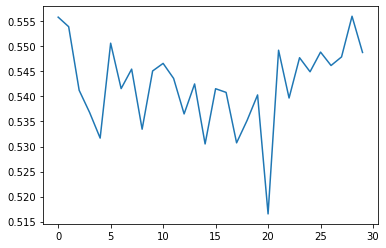

In [13]:
'''
  0.7PreLoss
  pre_loss = torch.mean((nor_labels-prediction).abs())*torch.mean((nor_labels-prediction).abs())
    union_loss = 1*triplet_loss+ 0.7*pre_loss
    return union_loss

device = 'cuda:7'
batch_size = 16
epochs = 200
lr = 0.0001
decay = 1e-3
num_layer = 5
emb_dim = 300
dropout_ratio = 0
JK = 'last'
dataset = 'EAAT3'
output_model_file = ''
gnn_type = 'gin'
seed = 0
num_workers = 8
mode = 'ada_batch_all_triplet_loss'   #ada_batch_all_triplet_loss,ada_batch_hard_triplet_loss,triplet_loss
feature_type = 'custom'  #random,onehot,custom,pseudo
graph_pooling = 'set2set2' #mean,last,sum,set2set,atention'''
import numpy as np
import matplotlib.pyplot as plt
#eaat3
cliff_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 
              1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
l = {0.1: [[0.5709501504898071, 0.5987632274627686, 0.5369771122932434, 0.5388957262039185, 0.5335098505020142]], 0.2: [[0.5526636242866516, 0.512312650680542, 0.5757388472557068, 0.5503518581390381, 0.5785007476806641]], 0.3: [[0.5214229822158813, 0.5167945027351379, 0.5281151533126831, 0.5617786645889282, 0.5779929161071777]], 0.4: [[0.5214717984199524, 0.4940621852874756, 0.5964074730873108, 0.47785621881484985, 0.5940477848052979]], 0.5: [[0.5228174328804016, 0.47750934958457947, 0.5614438652992249, 0.5421848893165588, 0.5544424653053284]], 0.6: [[0.5125176310539246, 0.5170440077781677, 0.5255537629127502, 0.5762829780578613, 0.6217048764228821]], 0.7: [[0.5245347023010254, 0.4822845160961151, 0.572939932346344, 0.515410840511322, 0.612617015838623]], 0.8: [[0.5105034708976746, 0.5021687150001526, 0.5260875225067139, 0.5835750699043274, 0.6048961281776428]], 0.9: [[0.4992167055606842, 0.48257240653038025, 0.5355228185653687, 0.5314213633537292, 0.6185321807861328]], 1.0: [[0.5269500613212585, 0.46485283970832825, 0.5371830463409424, 0.5695091485977173, 0.6268908977508545]], 1.1: [[0.5504151582717896, 0.46346500515937805, 0.5556733012199402, 0.5688474178314209, 0.5945494771003723]], 1.2: [[0.5185779929161072, 0.4702244997024536, 0.5597390532493591, 0.5454353094100952, 0.6239676475524902]], 1.3: [[0.5212894678115845, 0.46570736169815063, 0.5065470337867737, 0.557334840297699, 0.63164222240448]], 1.4: [[0.5352451205253601, 0.5035568475723267, 0.5688304901123047, 0.5094121098518372, 0.5953831076622009]], 1.5: [[0.5183544158935547, 0.4676482081413269, 0.5604727864265442, 0.4927222430706024, 0.6133592128753662]], 1.6: [[0.5051431059837341, 0.4858199954032898, 0.49486950039863586, 0.606928288936615, 0.6149019002914429]], 1.7: [[0.5305461883544922, 0.480889230966568, 0.5785411596298218, 0.5555109977722168, 0.5585123300552368]], 1.8: [[0.5206904411315918, 0.44517770409584045, 0.5466091632843018, 0.5034176707267761, 0.6377588510513306]], 1.9: [[0.5316529870033264, 0.4501115381717682, 0.5680693984031677, 0.5258939266204834, 0.6002880334854126]], 2.0: [[0.5174611210823059, 0.4764125943183899, 0.5154628753662109, 0.5347099900245667, 0.65742027759552]], 2.1: [[0.5077533721923828, 0.44772249460220337, 0.5367243885993958, 0.4887692332267761, 0.6017547845840454]], 2.2: [[0.5145569443702698, 0.4925588071346283, 0.5353085398674011, 0.596828818321228, 0.6068313121795654]], 2.3: [[0.5281368494033813, 0.4565335214138031, 0.5836576223373413, 0.5446736216545105, 0.585398256778717]], 2.4: [[0.5448334217071533, 0.4966540038585663, 0.5466355681419373, 0.5483168959617615, 0.6021665334701538]], 2.5: [[0.5110726356506348, 0.5192540884017944, 0.535653829574585, 0.5683912038803101, 0.5902140736579895]], 2.6: [[0.506843090057373, 0.47006678581237793, 0.5465888977050781, 0.5248759984970093, 0.6958521008491516]], 2.7: [[0.5205767750740051, 0.4719846248626709, 0.6002653241157532, 0.5590652227401733, 0.578938364982605]], 2.8: [[0.5524206161499023, 0.4483392834663391, 0.5584059953689575, 0.48794129490852356, 0.692304253578186]], 2.9: [[0.5364528894424438, 0.46021297574043274, 0.5821885466575623, 0.5003985166549683, 0.7007453441619873]], 3.0: [[0.5358665585517883, 0.45308661460876465, 0.5092459917068481, 0.6015964150428772, 0.644056499004364]]}
# m l = {0.1: [[0.6129848957061768, 0.6393113720417023, 0.5914448046684265, 0.612692699432373, 0.6372616565227509]], 0.2: [[0.5926237487792969, 0.587475483417511, 0.6096006894111633, 0.5825849735736847, 0.6572305202484131]], 0.3: [[0.5653382074832917, 0.5594718265533447, 0.5662330448627472, 0.6033853983879089, 0.6291343498229981]], 0.4: [[0.5580083191394806, 0.5248037272691727, 0.637749525308609, 0.5687013232707977, 0.6651146221160888]], 0.5: [[0.5991060781478882, 0.5129137647151947, 0.5903134167194366, 0.6133150041103363, 0.625578773021698]], 0.6: [[0.5419058299064636, 0.5467713809013367, 0.5714021825790405, 0.6365617549419403, 0.6690238273143768]], 0.7: [[0.5573504221439362, 0.5189596194028855, 0.6013437926769256, 0.5734736621379852, 0.6708755421638489]], 0.8: [[0.5466330420970916, 0.5458942770957946, 0.6072377860546112, 0.6453324103355408, 0.6564397227764129]], 0.9: [[0.5579960602521896, 0.5324669170379639, 0.570836797952652, 0.5632058966159821, 0.6773605477809906]], 1.0: [[0.5645449697971344, 0.5059779614210129, 0.5841020262241363, 0.6040797758102417, 0.6728842866420746]], 1.1: [[0.6037436175346375, 0.5044669818878174, 0.6100526058673859, 0.6220778632164001, 0.622799025774002]], 1.2: [[0.5566104066371917, 0.5154833263158798, 0.5954571282863617, 0.5923180532455444, 0.7057172453403473]], 1.3: [[0.573662999868393, 0.5381300812959671, 0.5540177667140961, 0.5858688735961914, 0.680492068529129]], 1.4: [[0.586801620721817, 0.5405667078495026, 0.5959898269176483, 0.5896960067749023, 0.6507562077045441]], 1.5: [[0.5598480129241943, 0.5239281249046326, 0.5853148365020752, 0.5717182517051697, 0.7141010510921478]], 1.6: [[0.5828501486778259, 0.5623892629146576, 0.5280172884464264, 0.649539852142334, 0.6659029388427734]], 1.7: [[0.5812562203407288, 0.5416516774892807, 0.5931788051128387, 0.5977187860012054, 0.606907045841217]], 1.8: [[0.5610750329494476, 0.5326335680484772, 0.5911941719055176, 0.5332200706005097, 0.678478229045868]], 1.9: [[0.5608932816982269, 0.5136404609680176, 0.5960719084739685, 0.6070214402675629, 0.622231410741806]], 2.0: [[0.5438934099674225, 0.5137113809585572, 0.5377794528007507, 0.5630539357662201, 0.7155519902706147]], 2.1: [[0.5787771940231323, 0.5787279999256134, 0.5881873333454132, 0.5260325223207474, 0.7270389533042908]], 2.2: [[0.5607042884826661, 0.5985998141765595, 0.6074950957298278, 0.6231606101989746, 0.7020380568504333]], 2.3: [[0.5698740768432617, 0.5177260166406632, 0.6230917978286743, 0.6050941896438599, 0.649881591796875]], 2.4: [[0.6046816551685333, 0.5564614796638488, 0.6108837783336639, 0.5914087545871735, 0.6596327376365662]], 2.5: [[0.6129973375797272, 0.599290201663971, 0.590303726196289, 0.5940239894390106, 0.6601126980781555]], 2.6: [[0.5395353937149048, 0.5144585448503495, 0.5776121962070465, 0.6484712600708008, 0.7497937679290771]], 2.7: [[0.6269094240665436, 0.5146791577339173, 0.6440334761142731, 0.5959540510177612, 0.6189381945133209]], 2.8: [[0.6123307144641876, 0.5349614083766937, 0.5876171088218689, 0.5397625488042831, 0.7507485902309418]], 2.9: [[0.572821592092514, 0.5275131106376648, 0.6651466476917267, 0.5473345696926117, 0.7621958839893341]], 3.0: [[0.5653735995292664, 0.5099826091527939, 0.5473737514019013, 0.6452038681507111, 0.7076947581768036]]}

data_dict = {}
for i in range(0,1):
    data_dict[i] = []
for cliff in cliff_list:
    for i in range(len(l[cliff])):
        k=np.array(l[cliff][i]).mean()
        data_dict[i].append(k)
print(data_dict)


for i in range(0,1):
    plt.figure(i)
    plt.plot(data_dict[i])
    #plt.savefig('./paper/try2_eaat3'+'.jpg')
    plt.show(i)
    plt.close(i)

{0: [0.5653303265571594, 0.5527320981025696, 0.5402977347373963, 0.541075599193573, 0.5380612730979919, 0.561924684047699, 0.5380666851997375, 0.5393628239631653, 0.5444546818733216, 0.5409592509269714, 0.5438029646873475, 0.5389674603939056, 0.5359813809394837, 0.5336514294147492, 0.5349529325962067, 0.5410565257072448, 0.5323423922061921, 0.5290216505527496, 0.5327306926250458, 0.5384761095046997, 0.5370540797710419, 0.5271377563476562, 0.537311339378357, 0.5311901688575744, 0.5471024334430694, 0.5388989865779876, 0.5321154713630676, 0.5351442873477936, 0.5550739824771881, 0.5625423967838288]}


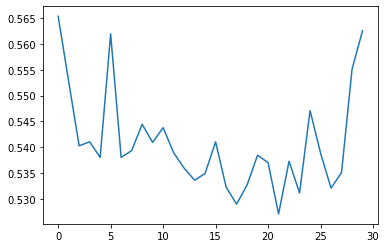

In [14]:
'''
try8固定seed0

'''
import numpy as np
import matplotlib.pyplot as plt
#eaat3
cliff_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 
              1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
l = {0.1: [[0.5510578751564026, 0.5579538941383362, 0.6191944479942322, 0.5278506875038147, 0.5705947279930115]], 0.2: [[0.55142742395401, 0.5231356024742126, 0.5479464530944824, 0.5618898868560791, 0.5792611241340637]], 0.3: [[0.515599250793457, 0.5166015028953552, 0.5299306511878967, 0.5627148747444153, 0.5766423940658569]], 0.4: [[0.5171546936035156, 0.49717259407043457, 0.5864061713218689, 0.5374026298522949, 0.567241907119751]], 0.5: [[0.5230509638786316, 0.4923504590988159, 0.5651427507400513, 0.5163745284080505, 0.5933876633644104]], 0.6: [[0.5136688351631165, 0.5016844868659973, 0.589298665523529, 0.5865525007247925, 0.6184189319610596]], 0.7: [[0.5060085654258728, 0.49594616889953613, 0.5713866353034973, 0.533799409866333, 0.5831926465034485]], 0.8: [[0.5095412135124207, 0.4698162078857422, 0.5769331455230713, 0.5329921245574951, 0.6075314283370972]], 0.9: [[0.5207611918449402, 0.47142118215560913, 0.5338796377182007, 0.563170850276947, 0.6330405473709106]], 1.0: [[0.515035092830658, 0.4818737506866455, 0.5263018608093262, 0.5365073680877686, 0.645078182220459]], 1.1: [[0.5571191310882568, 0.4977862238883972, 0.568778395652771, 0.5168988108634949, 0.5784322619438171]], 1.2: [[0.5030250549316406, 0.49021559953689575, 0.5962893962860107, 0.4822252690792084, 0.6230819821357727]], 1.3: [[0.5125520825386047, 0.4479382038116455, 0.5626711845397949, 0.5195634961128235, 0.6371819376945496]], 1.4: [[0.548324704170227, 0.4970756471157074, 0.5384156703948975, 0.5074787735939026, 0.5769623517990112]], 1.5: [[0.5230947732925415, 0.48012980818748474, 0.5227929353713989, 0.5250431299209595, 0.6237040162086487]], 1.6: [[0.5142517685890198, 0.5005578398704529, 0.5391054153442383, 0.5225199460983276, 0.6288476586341858]], 1.7: [[0.49189797043800354, 0.5119646191596985, 0.535965621471405, 0.5314499735832214, 0.5904337763786316]], 1.8: [[0.5103364586830139, 0.4678247272968292, 0.5049505829811096, 0.5821390151977539, 0.5798574686050415]], 1.9: [[0.5442079901695251, 0.49422815442085266, 0.5302183032035828, 0.5190412402153015, 0.5759577751159668]], 2.0: [[0.5007739663124084, 0.49247992038726807, 0.5270785093307495, 0.5415085554122925, 0.63053959608078]], 2.1: [[0.5191072821617126, 0.49196600914001465, 0.5413902997970581, 0.482522577047348, 0.6502842307090759]], 2.2: [[0.5227920413017273, 0.4936959147453308, 0.515414297580719, 0.5341877341270447, 0.5695987939834595]], 2.3: [[0.5262317657470703, 0.4725026488304138, 0.5616297721862793, 0.530005931854248, 0.5961865782737732]], 2.4: [[0.5251703858375549, 0.4820352792739868, 0.5662363767623901, 0.5218273997306824, 0.5606814026832581]], 2.5: [[0.5533873438835144, 0.4527381360530853, 0.5229762196540833, 0.5508825778961182, 0.6555278897285461]], 2.6: [[0.4987545907497406, 0.47133201360702515, 0.5034734010696411, 0.5528376698493958, 0.6680972576141357]], 2.7: [[0.5217245817184448, 0.43683022260665894, 0.5896751284599304, 0.515773594379425, 0.5965738296508789]], 2.8: [[0.5076574683189392, 0.47528186440467834, 0.5560186505317688, 0.5121012330055237, 0.6246622204780579]], 2.9: [[0.546217143535614, 0.4490616023540497, 0.5899385809898376, 0.5807561874389648, 0.6093963980674744]], 3.0: [[0.5573039054870605, 0.49109867215156555, 0.6113308072090149, 0.5569416284561157, 0.596036970615387]]}# m l = {0.1: [[0.6129848957061768, 0.6393113720417023, 0.5914448046684265, 0.612692699432373, 0.6372616565227509]], 0.2: [[0.5926237487792969, 0.587475483417511, 0.6096006894111633, 0.5825849735736847, 0.6572305202484131]], 0.3: [[0.5653382074832917, 0.5594718265533447, 0.5662330448627472, 0.6033853983879089, 0.6291343498229981]], 0.4: [[0.5580083191394806, 0.5248037272691727, 0.637749525308609, 0.5687013232707977, 0.6651146221160888]], 0.5: [[0.5991060781478882, 0.5129137647151947, 0.5903134167194366, 0.6133150041103363, 0.625578773021698]], 0.6: [[0.5419058299064636, 0.5467713809013367, 0.5714021825790405, 0.6365617549419403, 0.6690238273143768]], 0.7: [[0.5573504221439362, 0.5189596194028855, 0.6013437926769256, 0.5734736621379852, 0.6708755421638489]], 0.8: [[0.5466330420970916, 0.5458942770957946, 0.6072377860546112, 0.6453324103355408, 0.6564397227764129]], 0.9: [[0.5579960602521896, 0.5324669170379639, 0.570836797952652, 0.5632058966159821, 0.6773605477809906]], 1.0: [[0.5645449697971344, 0.5059779614210129, 0.5841020262241363, 0.6040797758102417, 0.6728842866420746]], 1.1: [[0.6037436175346375, 0.5044669818878174, 0.6100526058673859, 0.6220778632164001, 0.622799025774002]], 1.2: [[0.5566104066371917, 0.5154833263158798, 0.5954571282863617, 0.5923180532455444, 0.7057172453403473]], 1.3: [[0.573662999868393, 0.5381300812959671, 0.5540177667140961, 0.5858688735961914, 0.680492068529129]], 1.4: [[0.586801620721817, 0.5405667078495026, 0.5959898269176483, 0.5896960067749023, 0.6507562077045441]], 1.5: [[0.5598480129241943, 0.5239281249046326, 0.5853148365020752, 0.5717182517051697, 0.7141010510921478]], 1.6: [[0.5828501486778259, 0.5623892629146576, 0.5280172884464264, 0.649539852142334, 0.6659029388427734]], 1.7: [[0.5812562203407288, 0.5416516774892807, 0.5931788051128387, 0.5977187860012054, 0.606907045841217]], 1.8: [[0.5610750329494476, 0.5326335680484772, 0.5911941719055176, 0.5332200706005097, 0.678478229045868]], 1.9: [[0.5608932816982269, 0.5136404609680176, 0.5960719084739685, 0.6070214402675629, 0.622231410741806]], 2.0: [[0.5438934099674225, 0.5137113809585572, 0.5377794528007507, 0.5630539357662201, 0.7155519902706147]], 2.1: [[0.5787771940231323, 0.5787279999256134, 0.5881873333454132, 0.5260325223207474, 0.7270389533042908]], 2.2: [[0.5607042884826661, 0.5985998141765595, 0.6074950957298278, 0.6231606101989746, 0.7020380568504333]], 2.3: [[0.5698740768432617, 0.5177260166406632, 0.6230917978286743, 0.6050941896438599, 0.649881591796875]], 2.4: [[0.6046816551685333, 0.5564614796638488, 0.6108837783336639, 0.5914087545871735, 0.6596327376365662]], 2.5: [[0.6129973375797272, 0.599290201663971, 0.590303726196289, 0.5940239894390106, 0.6601126980781555]], 2.6: [[0.5395353937149048, 0.5144585448503495, 0.5776121962070465, 0.6484712600708008, 0.7497937679290771]], 2.7: [[0.6269094240665436, 0.5146791577339173, 0.6440334761142731, 0.5959540510177612, 0.6189381945133209]], 2.8: [[0.6123307144641876, 0.5349614083766937, 0.5876171088218689, 0.5397625488042831, 0.7507485902309418]], 2.9: [[0.572821592092514, 0.5275131106376648, 0.6651466476917267, 0.5473345696926117, 0.7621958839893341]], 3.0: [[0.5653735995292664, 0.5099826091527939, 0.5473737514019013, 0.6452038681507111, 0.7076947581768036]]}

data_dict = {}
for i in range(0,1):
    data_dict[i] = []
for cliff in cliff_list:
    for i in range(len(l[cliff])):
        k=np.array(l[cliff][i]).mean()
        data_dict[i].append(k)
print(data_dict)


for i in range(0,1):
    plt.figure(i)
    plt.plot(data_dict[i])
    #plt.savefig('./paper/try2_eaat3'+'.jpg')
    plt.show(i)
    plt.close(i)

{0: [0.550803005695343, 0.5477390587329865, 0.5546622157096863, 0.5471445918083191, 0.5727701187133789, 0.5665880084037781, 0.5827428221702575, 0.5705095291137695, 0.5672375559806824, 0.5587082147598267, 0.5607871592044831, 0.5431507229804993, 0.5882483959197998, 0.5578895807266235, 0.5716165184974671, 0.5558833122253418, 0.5650296688079834, 0.5634445548057556, 0.564231663942337, 0.5487874507904053, 0.5641978621482849, 0.5538233160972595, 0.5609915256500244, 0.5449059545993805, 0.5695924758911133, 0.5527083158493042, 0.5625619649887085, 0.553554356098175, 0.561824381351471, 0.5495139539241791]}


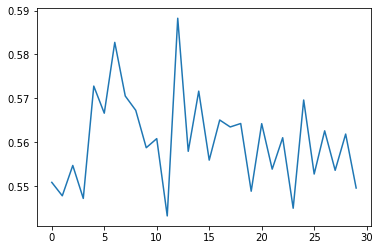

In [3]:
'''
try8 消融实验,shuffle是ture,试试false还有用MAEloss不是mse
    pre_loss = torch.mean((nor_labels-prediction).abs())*torch.mean((nor_labels-prediction).abs())
    union_loss = 0*triplet_loss+ 1*pre_loss
    return union_loss

device = 'cuda:7'
batch_size = 16
epochs = 200
lr = 0.0001
decay = 1e-3
num_layer = 5
emb_dim = 300
dropout_ratio = 0
JK = 'last'
dataset = 'EAAT3'
output_model_file = ''
gnn_type = 'gin'
seed = 0
num_workers = 8
mode = 'ada_batch_all_triplet_loss'   #ada_batch_all_triplet_loss,ada_batch_hard_triplet_loss,triplet_loss
feature_type = 'custom'  #random,onehot,custom,pseudo
graph_pooling = 'set2set2' #mean,last,sum,set2set,atention
'''
import numpy as np
import matplotlib.pyplot as plt
#eaat3
cliff_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 
              1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
l = {0.1: [[0.5577124953269958, 0.4663569927215576, 0.5787757635116577, 0.5397405624389648, 0.6114292144775391]], 0.2: [[0.545109212398529, 0.480692058801651, 0.532263994216919, 0.5709968209266663, 0.609633207321167]], 0.3: [[0.5493952035903931, 0.4829522967338562, 0.5325389504432678, 0.6006929278373718, 0.6077316999435425]], 0.4: [[0.5316578149795532, 0.466184139251709, 0.5968180894851685, 0.5283083915710449, 0.6127545237541199]], 0.5: [[0.5454626679420471, 0.5435217618942261, 0.5790114998817444, 0.5725501179695129, 0.623304545879364]], 0.6: [[0.5469537973403931, 0.533237874507904, 0.552951991558075, 0.5730459690093994, 0.6267504096031189]], 0.7: [[0.5554804801940918, 0.5609439611434937, 0.5843198895454407, 0.5341168642044067, 0.678852915763855]], 0.8: [[0.5830577611923218, 0.5314090251922607, 0.6124816536903381, 0.5440577864646912, 0.5815414190292358]], 0.9: [[0.5416855216026306, 0.4892114996910095, 0.6076905727386475, 0.5978671908378601, 0.5997329950332642]], 1.0: [[0.5470502972602844, 0.5156631469726562, 0.534112811088562, 0.5710101127624512, 0.6257047057151794]], 1.1: [[0.5678333044052124, 0.4928928315639496, 0.5732854008674622, 0.5603734850883484, 0.6095507740974426]], 1.2: [[0.5259924530982971, 0.4660147428512573, 0.5940994620323181, 0.5189653635025024, 0.6106815934181213]], 1.3: [[0.553298830986023, 0.5530921220779419, 0.6159119009971619, 0.5509214401245117, 0.6680176854133606]], 1.4: [[0.5497697591781616, 0.5173653364181519, 0.5215041637420654, 0.6037580370903015, 0.5970506072044373]], 1.5: [[0.5570539832115173, 0.49673229455947876, 0.5937461853027344, 0.5956183671951294, 0.6149317622184753]], 1.6: [[0.5617232918739319, 0.4916266202926636, 0.5478467345237732, 0.587741494178772, 0.5904784202575684]], 1.7: [[0.5189847946166992, 0.5096859931945801, 0.5933122634887695, 0.5658531188964844, 0.6373121738433838]], 1.8: [[0.5517378449440002, 0.506517767906189, 0.5437808036804199, 0.5923279523849487, 0.6228584051132202]], 1.9: [[0.5723469257354736, 0.48245248198509216, 0.591812789440155, 0.5678465366363525, 0.6066995859146118]], 2.0: [[0.5491660833358765, 0.4809281826019287, 0.5968636870384216, 0.5437129735946655, 0.573266327381134]], 2.1: [[0.558509886264801, 0.5188483595848083, 0.5809481143951416, 0.5578159093856812, 0.6048670411109924]], 2.2: [[0.5473166704177856, 0.4854907989501953, 0.5605919361114502, 0.5761952996253967, 0.5995218753814697]], 2.3: [[0.5307263731956482, 0.47710227966308594, 0.6194751858711243, 0.5865926146507263, 0.5910611748695374]], 2.4: [[0.5300571918487549, 0.4691754877567291, 0.5958585739135742, 0.5634952187538147, 0.5659433007240295]], 2.5: [[0.5625489950180054, 0.5125524997711182, 0.5409954786300659, 0.5996063947677612, 0.6322590112686157]], 2.6: [[0.555080235004425, 0.4986504912376404, 0.5159216523170471, 0.5627972483634949, 0.6310919523239136]], 2.7: [[0.540830135345459, 0.4808662533760071, 0.6230562925338745, 0.5596504807472229, 0.608406662940979]], 2.8: [[0.5541171431541443, 0.48791372776031494, 0.563866376876831, 0.5544113516807556, 0.6074631810188293]], 2.9: [[0.540198564529419, 0.5049926042556763, 0.5782188177108765, 0.5779236555099487, 0.6077882647514343]], 3.0: [[0.5271293520927429, 0.48278525471687317, 0.6231734156608582, 0.5190166234970093, 0.5954651236534119]]}
#m l = {0.1: [[0.619189921617508, 0.5883859288692475, 0.6709311950206757, 0.5835797297954559, 0.687608585357666]], 0.2: [[0.6035618257522583, 0.5676775830984115, 0.639895693063736, 0.6075445199012757, 0.6911187481880188]], 0.3: [[0.6120573711395264, 0.540841560959816, 0.6361707854270935, 0.6946771907806396, 0.6909309566020966]], 0.4: [[0.6062773561477661, 0.5584606873989105, 0.6721188402175904, 0.6557429039478302, 0.6834096765518188]], 0.5: [[0.6020102834701538, 0.6689379000663758, 0.6435639214515686, 0.627200322151184, 0.701684467792511]], 0.6: [[0.6200785386562347, 0.6687306869029999, 0.629778106212616, 0.6295564293861389, 0.746009178161621]], 0.7: [[0.6272137212753296, 0.5837784874439239, 0.6456323027610779, 0.6210835659503937, 0.7712708222866058]], 0.8: [[0.6703363406658173, 0.6227573096752167, 0.705147225856781, 0.6231848549842834, 0.6922515821456909]], 0.9: [[0.6525266921520233, 0.6609988701343537, 0.6609146440029144, 0.6504360699653625, 0.7010552072525025]], 1.0: [[0.5989703524112702, 0.6429315412044525, 0.5769077289104462, 0.6606202566623688, 0.6839650046825408]], 1.1: [[0.6266614484786988, 0.6287278264760972, 0.64104727268219, 0.627540316581726, 0.7318756008148193]], 1.2: [[0.5908714330196381, 0.5092508244514465, 0.72274258852005, 0.5999934446811676, 0.7184492063522339]], 1.3: [[0.5994551062583924, 0.6449894273281097, 0.6823368322849274, 0.6276723718643189, 0.740264676809311]], 1.4: [[0.6043873047828674, 0.5794720816612243, 0.6380922865867614, 0.6422106337547302, 0.6591627037525177]], 1.5: [[0.6453733825683594, 0.6611878538131714, 0.6120600509643555, 0.683040246963501, 0.7027998089790344]], 1.6: [[0.6438644421100617, 0.726641696691513, 0.5914427089691162, 0.6948543846607208, 0.750814483165741]], 1.7: [[0.6437191259860993, 0.5908077645301819, 0.6905756855010986, 0.6493410217761993, 0.6889055740833282]], 1.8: [[0.593914361000061, 0.6100470328330994, 0.6417945468425751, 0.6374446797370911, 0.7051608455181122]], 1.9: [[0.6308054399490356, 0.6067271685600281, 0.6597384321689606, 0.6550970804691315, 0.6552645123004913]], 2.0: [[0.661632878780365, 0.5970883971452713, 0.6847179281711578, 0.6311125922203064, 0.6710673880577087]], 2.1: [[0.6085145950317383, 0.5878072941303253, 0.6879830479621887, 0.6450980341434479, 0.7138966047763824]], 2.2: [[0.6455689811706543, 0.5786557483673096, 0.7062773883342743, 0.7029788136482239, 0.7228604578971862]], 2.3: [[0.6000729548931122, 0.6212420439720154, 0.6950552427768707, 0.6217874813079834, 0.658545548915863]], 2.4: [[0.5596738255023956, 0.6272658503055573, 0.6589282643795014, 0.7052506363391876, 0.6999658346176147]], 2.5: [[0.6021931397914887, 0.5865845477581024, 0.5859129965305329, 0.6556693923473358, 0.7231684696674346]], 2.6: [[0.6222606837749481, 0.6541140234470367, 0.577494066953659, 0.6228904902935029, 0.7232216823101044]], 2.7: [[0.5772527599334717, 0.5995820468664169, 0.6752279150485992, 0.6531583511829376, 0.689057103395462]], 2.8: [[0.590408959388733, 0.5749207210540771, 0.6633365702629089, 0.6173411846160889, 0.736234872341156]], 2.9: [[0.5833564150333405, 0.6991169548034668, 0.6822787761688233, 0.6631166684627533, 0.7192121183872223]], 3.0: [[0.5688524973392487, 0.5577312779426574, 0.6985078251361847, 0.6082325124740601, 0.6751382350921631]]}

data_dict = {}
for i in range(0,1):
    data_dict[i] = []
for cliff in cliff_list:
    for i in range(len(l[cliff])):
        k=np.array(l[cliff][i]).mean()
        data_dict[i].append(k)
print(data_dict)


for i in range(0,1):
    plt.figure(i)
    plt.plot(data_dict[i])
    #plt.savefig('./paper/try2_eaat3'+'.jpg')
    plt.show(i)
    plt.close(i)

{0: [0.557865846157074, 0.5690725803375244, 0.5685390114784241, 0.5566544890403747, 0.5697270512580872, 0.568394911289215, 0.5675603747367859, 0.5585116744041443, 0.5681462526321411, 0.5644521117210388, 0.5547722101211547, 0.5548221647739411, 0.585532009601593, 0.5589888095855713, 0.5468053936958313, 0.5765402972698211, 0.5612115025520324, 0.5791330575942993, 0.5546190917491913, 0.5517017900943756, 0.5720850110054017, 0.5539392948150634, 0.5500003814697265, 0.5521450459957122, 0.5770228743553162, 0.5573975086212158, 0.5632286846637726, 0.5610110104084015, 0.5687662243843079, 0.5559839248657227]}


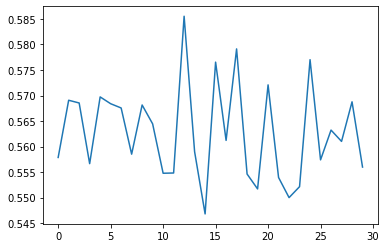

In [6]:
'''



'''
import numpy as np
import matplotlib.pyplot as plt
#eaat3
cliff_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 
              1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
l = {0.1: [[0.5442410111427307, 0.4859963655471802, 0.5957178473472595, 0.5708950161933899, 0.5924789905548096]], 0.2: [[0.5449113249778748, 0.4931296706199646, 0.6128466129302979, 0.5920369625091553, 0.6024383306503296]], 0.3: [[0.5461376309394836, 0.5178396701812744, 0.5462393760681152, 0.6221217513084412, 0.6103566288948059]], 0.4: [[0.5394210815429688, 0.4757177233695984, 0.5843038558959961, 0.5482540726661682, 0.6355757117271423]], 0.5: [[0.5684413909912109, 0.5610818862915039, 0.5859072208404541, 0.5606928467750549, 0.5725119113922119]], 0.6: [[0.5481398701667786, 0.49099671840667725, 0.5598381161689758, 0.5785453915596008, 0.664454460144043]], 0.7: [[0.5435652732849121, 0.4844388961791992, 0.5801531076431274, 0.561908483505249, 0.6677361130714417]], 0.8: [[0.5376361012458801, 0.5080164670944214, 0.5904701352119446, 0.5403465032577515, 0.6160891652107239]], 0.9: [[0.5289848446846008, 0.5209771394729614, 0.5498009920120239, 0.598579466342926, 0.6423888206481934]], 1.0: [[0.5860270857810974, 0.4814426302909851, 0.5263813138008118, 0.6176262497901917, 0.6107832789421082]], 1.1: [[0.5538527965545654, 0.5118451714515686, 0.6105509400367737, 0.5173323154449463, 0.5802798271179199]], 1.2: [[0.5610880255699158, 0.474005788564682, 0.6046872138977051, 0.5269756317138672, 0.6073541641235352]], 1.3: [[0.5698043704032898, 0.5164938569068909, 0.6287176012992859, 0.526309072971344, 0.6863351464271545]], 1.4: [[0.5611616969108582, 0.4956209063529968, 0.5314369797706604, 0.599657416343689, 0.6070670485496521]], 1.5: [[0.5276429653167725, 0.49471980333328247, 0.5544750690460205, 0.5744379758834839, 0.5827511548995972]], 1.6: [[0.54352205991745, 0.49422189593315125, 0.6066364049911499, 0.5828118920326233, 0.6555092334747314]], 1.7: [[0.5182156562805176, 0.5144891142845154, 0.5831387042999268, 0.5717640519142151, 0.6184499859809875]], 1.8: [[0.5583127737045288, 0.526798665523529, 0.5946593880653381, 0.5994769930839539, 0.6164174675941467]], 1.9: [[0.5326499938964844, 0.4930548369884491, 0.5737774968147278, 0.5836372971534729, 0.5899758338928223]], 2.0: [[0.5572119355201721, 0.45977577567100525, 0.5881911516189575, 0.591058611869812, 0.5622714757919312]], 2.1: [[0.5912836194038391, 0.5231316685676575, 0.5936447381973267, 0.5432857275009155, 0.6090793013572693]], 2.2: [[0.529991090297699, 0.4820908308029175, 0.5356850028038025, 0.5733142495155334, 0.648615300655365]], 2.3: [[0.5352927446365356, 0.48562371730804443, 0.5901821851730347, 0.5809174180030823, 0.5579858422279358]], 2.4: [[0.5616021752357483, 0.4718506634235382, 0.5847249031066895, 0.5455281138420105, 0.597019374370575]], 2.5: [[0.5563662052154541, 0.5175700187683105, 0.5498914122581482, 0.5897676944732666, 0.6715190410614014]], 2.6: [[0.5737394094467163, 0.49376600980758667, 0.5423117876052856, 0.5745387673377991, 0.6026315689086914]], 2.7: [[0.5474458932876587, 0.4501088559627533, 0.5970653295516968, 0.6005182266235352, 0.621005117893219]], 2.8: [[0.5549191832542419, 0.48863187432289124, 0.5758410692214966, 0.5447101593017578, 0.6409527659416199]], 2.9: [[0.5413753390312195, 0.49817436933517456, 0.5870585441589355, 0.5965885519981384, 0.6206343173980713]], 3.0: [[0.541877269744873, 0.48454082012176514, 0.5943405628204346, 0.5670270919799805, 0.5921338796615601]]}

#m l = l = {0.1: [[0.6350769662857055, 0.5777009010314942, 0.6591567826271058, 0.6079686856269837, 0.6895555686950684]], 0.2: [[0.603101909160614, 0.5393924325704574, 0.6835101985931397, 0.6377804827690124, 0.6706878769397736]], 0.3: [[0.5767825448513031, 0.5738782203197479, 0.5990554475784302, 0.6707377934455871, 0.7039665353298187]], 0.4: [[0.6266081190109253, 0.6364144122600556, 0.6890850281715393, 0.6566023635864258, 0.7102978003025054]], 0.5: [[0.6037209177017212, 0.6388013482093811, 0.7157385635375977, 0.6333263993263245, 0.641050419807434]], 0.6: [[0.6216866135597229, 0.6004539453983306, 0.6368955612182617, 0.6502203404903412, 0.749475599527359]], 0.7: [[0.634296429157257, 0.555766481757164, 0.6896749222278595, 0.6953215515613556, 0.766888370513916]], 0.8: [[0.6216137886047364, 0.6129482114315032, 0.7163130807876587, 0.6416832399368286, 0.7066180908679962]], 0.9: [[0.594020756483078, 0.62551433801651, 0.6372365725040435, 0.6884567666053772, 0.7166905057430267]], 1.0: [[0.6380310654640198, 0.6357814657688141, 0.6405274403095246, 0.6692794251441956, 0.6974796521663665]], 1.1: [[0.6219871973991394, 0.6050018191337585, 0.6908434629440308, 0.5627020466327667, 0.6982103037834168]], 1.2: [[0.618538863658905, 0.5487390929460525, 0.699968079328537, 0.5857037949562073, 0.7389890694618225]], 1.3: [[0.5945834040641784, 0.624512482881546, 0.727093780040741, 0.6427994894981385, 0.7670736265182495]], 1.4: [[0.6533973038196563, 0.5810924339294433, 0.6262375903129578, 0.6588407468795776, 0.7035107743740082]], 1.5: [[0.6791522812843322, 0.5909707069396972, 0.7432205176353455, 0.6436205530166625, 0.6914391458034516]], 1.6: [[0.6038610780239105, 0.5336967325210571, 0.6359984743595123, 0.6425051188468933, 0.7203356981277466]], 1.7: [[0.5806106579303741, 0.6692592227458953, 0.6931336891651153, 0.6419897067546845, 0.6942027914524078]], 1.8: [[0.6472923517227173, 0.6131095743179321, 0.637414984703064, 0.6360728049278259, 0.6722617983818054]], 1.9: [[0.6049239146709442, 0.5749991667270661, 0.6306197011470794, 0.6238676989078522, 0.6851636517047882]], 2.0: [[0.6026063942909241, 0.5692404788732529, 0.6383751928806305, 0.6518282055854797, 0.668827679157257]], 2.1: [[0.6663192510604858, 0.6224699354171753, 0.6395012879371643, 0.591820683479309, 0.7098837554454803]], 2.2: [[0.6085212564468384, 0.5799257302284241, 0.6091905331611633, 0.6512749755382538, 0.7173111987113953]], 2.3: [[0.6297691607475281, 0.5672726082801819, 0.6317090344429016, 0.6093046641349793, 0.6476267838478088]], 2.4: [[0.6011080598831177, 0.6082183349132538, 0.6539875280857086, 0.6291119229793548, 0.6948405373096466]], 2.5: [[0.6377424621582031, 0.6246506893634796, 0.673398779630661, 0.6953702819347382, 0.7285626125335694]], 2.6: [[0.6178506863117218, 0.5640879952907563, 0.6418156731128692, 0.6407746028900146, 0.7433302748203278]], 2.7: [[0.6141889572143555, 0.5376226854324341, 0.6477946615219117, 0.6737686574459076, 0.7433877968788147]], 2.8: [[0.6227980744838715, 0.5525949364900589, 0.6982526671886444, 0.6535958456993103, 0.7308759617805481]], 2.9: [[0.579884581565857, 0.5903039634227752, 0.7081570565700531, 0.6628779458999634, 0.7028636002540588]], 3.0: [[0.6173876917362213, 0.5690109932422638, 0.6505340063571929, 0.5970786225795746, 0.628299218416214]]}

data_dict = {}
for i in range(0,1):
    data_dict[i] = []
for cliff in cliff_list:
    for i in range(len(l[cliff])):
        k=np.array(l[cliff][i]).mean()
        data_dict[i].append(k)
print(data_dict)


for i in range(0,1):
    plt.figure(i)
    plt.plot(data_dict[i])
    #plt.savefig('./paper/try2_eaat3'+'.jpg')
    plt.show(i)
    plt.close(i)

{0: [0.560318648815155, 0.5401265382766723, 0.5521133184432984, 0.5528410196304321, 0.5416358232498169, 0.5375244319438934, 0.5348565340042114, 0.5466309309005737, 0.5387351155281067, 0.5308086097240448, 0.5336638927459717, 0.5430350482463837, 0.5416922926902771, 0.540001779794693, 0.5355231702327728, 0.5406823217868805, 0.5265158891677857, 0.533420079946518, 0.5216154873371124, 0.5417727172374726, 0.5396514475345612, 0.5393545508384705, 0.5301222443580628, 0.5329835832118988, 0.537592887878418, 0.5202462673187256, 0.5254091322422028, 0.5406607568264008, 0.5478733599185943, 0.5503873109817505]}


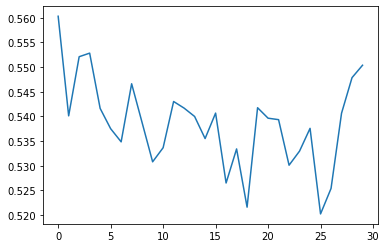

In [7]:
import numpy as np
import matplotlib.pyplot as plt
#eaat3
cliff_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 
              1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
l = {0.1: [[0.5454056859016418, 0.6005175709724426, 0.5684310793876648, 0.5086812376976013, 0.5785576701164246]], 0.2: [[0.5363166928291321, 0.5098537802696228, 0.5198259353637695, 0.5731335282325745, 0.5615027546882629]], 0.3: [[0.541718065738678, 0.5156431198120117, 0.5398410558700562, 0.5905026197433472, 0.5728617310523987]], 0.4: [[0.5705000162124634, 0.5007107853889465, 0.5856494307518005, 0.529367208480835, 0.5779776573181152]], 0.5: [[0.5249114036560059, 0.5123127698898315, 0.5632986426353455, 0.532660961151123, 0.5749953389167786]], 0.6: [[0.5067813992500305, 0.48362550139427185, 0.5324468612670898, 0.5315791368484497, 0.6331892609596252]], 0.7: [[0.5056442022323608, 0.4995836615562439, 0.5676048398017883, 0.5030475854873657, 0.5984023809432983]], 0.8: [[0.5172056555747986, 0.4663611054420471, 0.6078504920005798, 0.558489203453064, 0.5832481980323792]], 0.9: [[0.5252565145492554, 0.4620913863182068, 0.5543310642242432, 0.5717403888702393, 0.5802562236785889]], 1.0: [[0.5074355006217957, 0.48752322793006897, 0.537527859210968, 0.541259765625, 0.5802966952323914]], 1.1: [[0.5200123190879822, 0.49369150400161743, 0.5720245838165283, 0.5185481905937195, 0.564042866230011]], 1.2: [[0.515099823474884, 0.46827617287635803, 0.5826244950294495, 0.5116576552391052, 0.6375170946121216]], 1.3: [[0.5123230814933777, 0.46981433033943176, 0.5598154664039612, 0.49332931637763977, 0.6731792688369751]], 1.4: [[0.5409387350082397, 0.47310611605644226, 0.5268988609313965, 0.556666910648346, 0.6023982763290405]], 1.5: [[0.5282363891601562, 0.4832143485546112, 0.5312942266464233, 0.5207301378250122, 0.6141407489776611]], 1.6: [[0.5143935680389404, 0.4696146547794342, 0.5260527729988098, 0.5464672446250916, 0.6468833684921265]], 1.7: [[0.49638545513153076, 0.48594123125076294, 0.5459939241409302, 0.5142338871955872, 0.5900249481201172]], 1.8: [[0.510545551776886, 0.4798339307308197, 0.5089386105537415, 0.5692172050476074, 0.5985651016235352]], 1.9: [[0.5260896682739258, 0.486196368932724, 0.5468201637268066, 0.5130334496498108, 0.5359377861022949]], 2.0: [[0.4980313777923584, 0.47968772053718567, 0.5408427119255066, 0.5310730934143066, 0.6592286825180054]], 2.1: [[0.5214325189590454, 0.48090437054634094, 0.5447839498519897, 0.5094999074935913, 0.6416364908218384]], 2.2: [[0.5085372924804688, 0.5144122242927551, 0.5311920642852783, 0.5363867878913879, 0.6062443852424622]], 2.3: [[0.5219712853431702, 0.48547619581222534, 0.5348103046417236, 0.5315349102020264, 0.5768185257911682]], 2.4: [[0.4905809462070465, 0.4591907262802124, 0.5509754419326782, 0.5276793837547302, 0.6364914178848267]], 2.5: [[0.5365943908691406, 0.4598739743232727, 0.532581090927124, 0.5661609768867493, 0.5927540063858032]], 2.6: [[0.49029868841171265, 0.4881204068660736, 0.4804103672504425, 0.5127962827682495, 0.6296055912971497]], 2.7: [[0.5107168555259705, 0.4513130486011505, 0.5906547904014587, 0.5008869171142578, 0.5734740495681763]], 2.8: [[0.5155216455459595, 0.4953278601169586, 0.5348813533782959, 0.4959414005279541, 0.6616315245628357]], 2.9: [[0.5202114582061768, 0.45738139748573303, 0.5810356736183167, 0.5826031565666199, 0.5981351137161255]], 3.0: [[0.5197451114654541, 0.5034304857254028, 0.5992394685745239, 0.5328598022460938, 0.5966616868972778]]}

#m l = l = {0.1: [[0.6350769662857055, 0.5777009010314942, 0.6591567826271058, 0.6079686856269837, 0.6895555686950684]], 0.2: [[0.603101909160614, 0.5393924325704574, 0.6835101985931397, 0.6377804827690124, 0.6706878769397736]], 0.3: [[0.5767825448513031, 0.5738782203197479, 0.5990554475784302, 0.6707377934455871, 0.7039665353298187]], 0.4: [[0.6266081190109253, 0.6364144122600556, 0.6890850281715393, 0.6566023635864258, 0.7102978003025054]], 0.5: [[0.6037209177017212, 0.6388013482093811, 0.7157385635375977, 0.6333263993263245, 0.641050419807434]], 0.6: [[0.6216866135597229, 0.6004539453983306, 0.6368955612182617, 0.6502203404903412, 0.749475599527359]], 0.7: [[0.634296429157257, 0.555766481757164, 0.6896749222278595, 0.6953215515613556, 0.766888370513916]], 0.8: [[0.6216137886047364, 0.6129482114315032, 0.7163130807876587, 0.6416832399368286, 0.7066180908679962]], 0.9: [[0.594020756483078, 0.62551433801651, 0.6372365725040435, 0.6884567666053772, 0.7166905057430267]], 1.0: [[0.6380310654640198, 0.6357814657688141, 0.6405274403095246, 0.6692794251441956, 0.6974796521663665]], 1.1: [[0.6219871973991394, 0.6050018191337585, 0.6908434629440308, 0.5627020466327667, 0.6982103037834168]], 1.2: [[0.618538863658905, 0.5487390929460525, 0.699968079328537, 0.5857037949562073, 0.7389890694618225]], 1.3: [[0.5945834040641784, 0.624512482881546, 0.727093780040741, 0.6427994894981385, 0.7670736265182495]], 1.4: [[0.6533973038196563, 0.5810924339294433, 0.6262375903129578, 0.6588407468795776, 0.7035107743740082]], 1.5: [[0.6791522812843322, 0.5909707069396972, 0.7432205176353455, 0.6436205530166625, 0.6914391458034516]], 1.6: [[0.6038610780239105, 0.5336967325210571, 0.6359984743595123, 0.6425051188468933, 0.7203356981277466]], 1.7: [[0.5806106579303741, 0.6692592227458953, 0.6931336891651153, 0.6419897067546845, 0.6942027914524078]], 1.8: [[0.6472923517227173, 0.6131095743179321, 0.637414984703064, 0.6360728049278259, 0.6722617983818054]], 1.9: [[0.6049239146709442, 0.5749991667270661, 0.6306197011470794, 0.6238676989078522, 0.6851636517047882]], 2.0: [[0.6026063942909241, 0.5692404788732529, 0.6383751928806305, 0.6518282055854797, 0.668827679157257]], 2.1: [[0.6663192510604858, 0.6224699354171753, 0.6395012879371643, 0.591820683479309, 0.7098837554454803]], 2.2: [[0.6085212564468384, 0.5799257302284241, 0.6091905331611633, 0.6512749755382538, 0.7173111987113953]], 2.3: [[0.6297691607475281, 0.5672726082801819, 0.6317090344429016, 0.6093046641349793, 0.6476267838478088]], 2.4: [[0.6011080598831177, 0.6082183349132538, 0.6539875280857086, 0.6291119229793548, 0.6948405373096466]], 2.5: [[0.6377424621582031, 0.6246506893634796, 0.673398779630661, 0.6953702819347382, 0.7285626125335694]], 2.6: [[0.6178506863117218, 0.5640879952907563, 0.6418156731128692, 0.6407746028900146, 0.7433302748203278]], 2.7: [[0.6141889572143555, 0.5376226854324341, 0.6477946615219117, 0.6737686574459076, 0.7433877968788147]], 2.8: [[0.6227980744838715, 0.5525949364900589, 0.6982526671886444, 0.6535958456993103, 0.7308759617805481]], 2.9: [[0.579884581565857, 0.5903039634227752, 0.7081570565700531, 0.6628779458999634, 0.7028636002540588]], 3.0: [[0.6173876917362213, 0.5690109932422638, 0.6505340063571929, 0.5970786225795746, 0.628299218416214]]}

data_dict = {}
for i in range(0,1):
    data_dict[i] = []
for cliff in cliff_list:
    for i in range(len(l[cliff])):
        k=np.array(l[cliff][i]).mean()
        data_dict[i].append(k)
print(data_dict)


for i in range(0,1):
    plt.figure(i)
    plt.plot(data_dict[i])
    #plt.savefig('./paper/try2_eaat3'+'.jpg')
    plt.show(i)
    plt.close(i)